In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [40]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import mplhep as hep
import sys
import torch
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.optimize import curve_fit
plt.style.use(hep.style.CMS)
np.set_printoptions(suppress=True)

sys.path.append('../python/')
# from cleaning import cleaning 
from event import event
sys.path.remove('../python/')

In [3]:
# Define bin boundaries with same numbers of events
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

In [6]:
gun_en        = []
gun_eta       = []
multi_en      = []
multi_eta     = []
multi_pt      = []
perc_trk      = []
genMatching   = []
genMatching_0 = []
skim          = []

fnamelist = [filepath for filepath in glob.glob('/grid_mnt/data_cms_upgrade/tarabini/electronsPU_dump/eventDump_*.npy')]
for file in fnamelist:
    with open(file, 'rb') as f:
        gun_en.append(np.load(f, allow_pickle=True))
        gun_eta.append(np.load(f, allow_pickle=True))
        multi_en.append(np.load(f, allow_pickle=True))
        multi_eta.append(np.load(f, allow_pickle=True))
        multi_pt.append(np.load(f, allow_pickle=True))
        perc_trk.append(np.load(f, allow_pickle=True))
        skim.append(np.load(f, allow_pickle=True))
        genMatching.append(np.load(f, allow_pickle=True))
#         genMatching_0.append(np.load(f, allow_pickle=True))
        
gun_en        = np.concatenate([arr for arr in gun_en])
gun_eta       = np.concatenate([arr for arr in gun_eta])
gun_pt        = gun_en/np.cosh(gun_eta)
multi_en      = np.concatenate([arr for arr in multi_en])
multi_eta     = np.concatenate([arr for arr in multi_eta])
multi_pt      = np.concatenate([arr for arr in multi_pt])
perc_trk      = np.concatenate([arr for arr in perc_trk])
skim          = np.concatenate([arr for arr in skim])
genMatching   = np.concatenate([arr for arr in genMatching])
# genMatching_0 = np.concatenate([arr for arr in genMatching_0])


In [7]:
multi_en_flatten = np.concatenate([arr for arr in multi_en])
multi_eta_flatten = np.concatenate([arr for arr in multi_eta])
multi_pt_flatten = np.concatenate([arr for arr in multi_pt])
perc_trk_flatten = np.concatenate([arr for arr in perc_trk])
skim_flatten = np.concatenate([arr for arr in skim])
genMatching_flatten = np.concatenate([arr for arr in genMatching])
# genMatching_0_flatten = np.concatenate([arr for arr in genMatching_0])

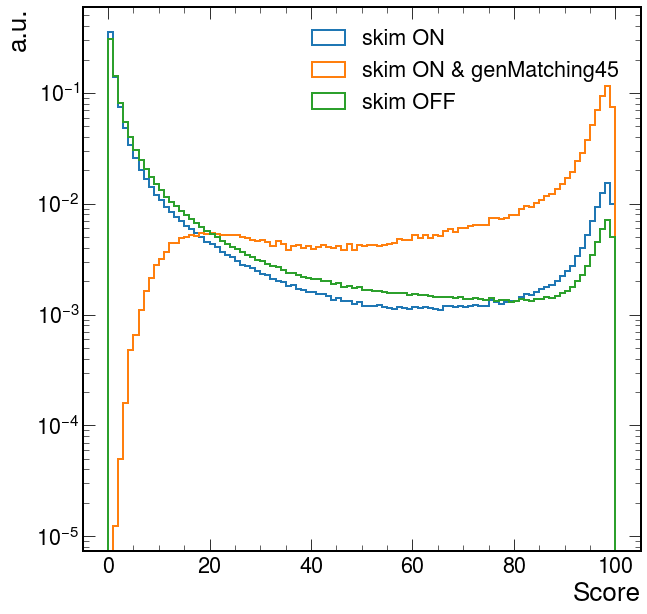

In [537]:
plt.hist(perc_trk_flatten[skim_flatten==False], bins=100, histtype='step', density=True, lw=2, label='skim ON', range=[0,100])
plt.hist(perc_trk_flatten[(skim_flatten==False)&(genMatching_flatten==True)], bins=100, histtype='step', density=True, lw=2, label='skim ON & genMatching45', range=[0,100])
plt.hist(perc_trk_flatten, bins=100, histtype='step', density=True, lw=2, label='skim OFF', range=[0,100])
plt.xlabel('Score')
plt.ylabel('a.u.')
plt.yscale('log')
plt.legend()
plt.show()

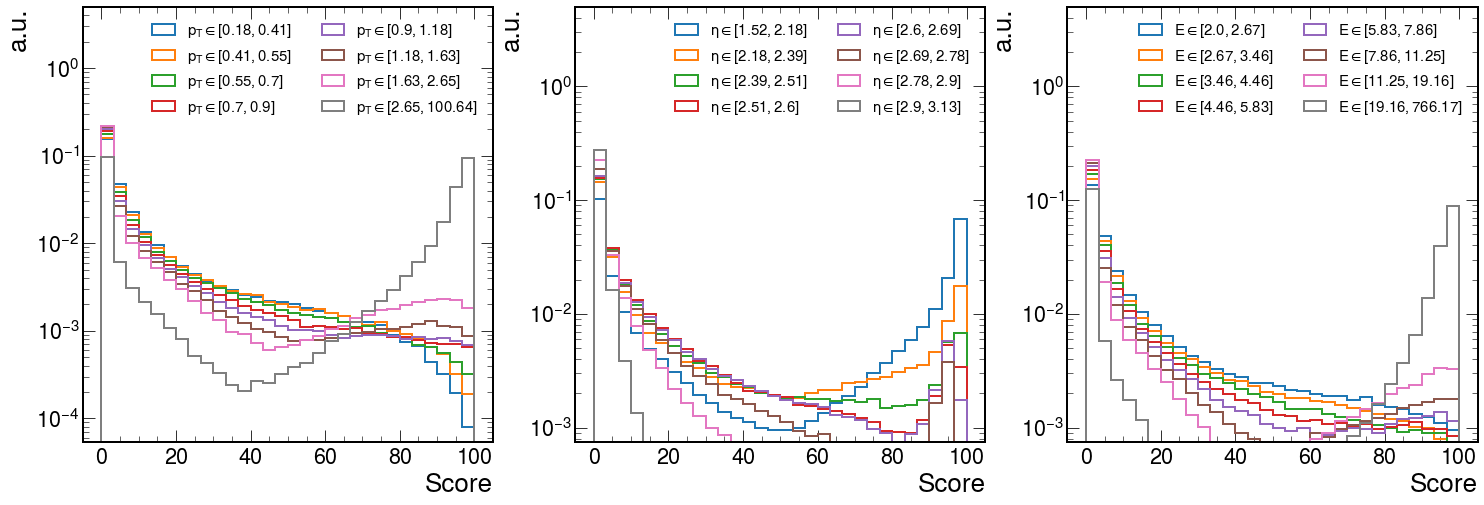

In [539]:
etaBins = histedges_equalN(abs(multi_eta_flatten)[(skim_flatten==False)], 8)
ptBins = histedges_equalN(abs(multi_pt_flatten)[(skim_flatten==False)], 8)
enBins = histedges_equalN(multi_en_flatten[(skim_flatten==False)], 8)

fig, axs = plt.subplots(1, 3, figsize=(25,8))
axs = axs.ravel()
for b in range(len(ptBins)-1):
    sel = (skim_flatten==False) & (multi_pt_flatten>ptBins[b]) & (multi_pt_flatten<=ptBins[b+1])
    axs[0].hist(perc_trk_flatten[sel], bins=30, histtype='step', density=True, lw=2, range=[0,100], label=r'$p_T\in['+str(round(ptBins[b],2))+','+str(round(ptBins[b+1],2))+']$')
    axs[0].set_yscale('log')
    axs[0].set_ylim(top=5)
    axs[0].legend(fontsize=15, ncol=2)
    axs[0].set_xlabel('Score')
    axs[0].set_ylabel('a.u.')
    
for b in range(len(etaBins)-1):
    sel = (skim_flatten==False) & (abs(multi_eta_flatten)>etaBins[b]) & (abs(multi_eta_flatten)<=etaBins[b+1])
    axs[1].hist(perc_trk_flatten[sel], bins=30, histtype='step', density=True, lw=2, range=[0,100], label=r'$\eta\in['+str(round(etaBins[b],2))+','+str(round(etaBins[b+1],2))+']$')
    axs[1].set_yscale('log')
    axs[1].set_ylim(top=5)
    axs[1].legend(fontsize=15, ncol=2)
    axs[1].set_xlabel('Score')
    axs[1].set_ylabel('a.u.')

for b in range(len(enBins)-1):
    sel = (skim_flatten==False) & (multi_en_flatten>enBins[b]) & (multi_en_flatten<=enBins[b+1])
    axs[2].hist(perc_trk_flatten[sel], bins=30, histtype='step', density=True, lw=2, range=[0,100], label=r'$E\in['+str(round(enBins[b],2))+','+str(round(enBins[b+1],2))+']$')
    axs[2].set_yscale('log')
    axs[2].set_ylim(top=5)
    axs[2].legend(fontsize=15, ncol=2)
    axs[2].set_xlabel('Score')
    axs[2].set_ylabel('a.u.')

plt.show()

# Energy resolution

In [99]:
# conds  = ['45simHits', 'score>20', 'score>40',   'score>60',   'score>80']
# colors = ['tab:blue',  'tab:orange',  'tab:red', 'tab:purple', 'tab:green']

conds_setup  = ['45simHits', 'score>20', 'score>25', 'score>30', 'score>35', 'score>40', 'score>45', 'score>50', 'score>55', 'score>60', 'score>65', 'score>70', 'score>75', 'score>80', 'score>85', 'score>90', 'score>95']
conds        = ['45simHits', 'score>40', 'score>50', 'score>60', 'score>70', 'score>80']
colors       = ['tab:blue',  'tab:red', 'tab:purple', 'tab:green', 'tab:orange']

In [34]:
recoEn = {}
recoEn_skim = {}

for cond in conds_setup:
    if cond == '45simHits':
        recoEn[cond]      = np.array([sum(multi_en[evt][(genMatching[evt]==True)]) for evt in range(len(multi_en))])
        recoEn_skim[cond] = np.array([sum(multi_en[evt][(skim[evt]==False)&(genMatching[evt]==True)]) for evt in range(len(multi_en))])
    else:
        recoEn[cond]      = np.array([sum(multi_en[evt][(perc_trk[evt]>int(cond[6:]))]) for evt in range(len(multi_en))])
        recoEn_skim[cond] = np.array([sum(multi_en[evt][(perc_trk[evt]>int(cond[6:]))&(skim[evt]==False)]) for evt in range(len(multi_en))])

In [575]:
# Count number of events that are killed by the gen-Matching
for cond in conds:
    print(cond)
    print('Number of events:', len(recoEn[cond][recoEn[cond]==0]))
    print('Fraction of events:', round(len(recoEn[cond][recoEn[cond]==0]) / len(recoEn[cond]) * 100, 2), '%')
    print('Number of events (skimON):', len(recoEn_skim[cond][recoEn_skim[cond]==0]))
    print('Fraction of events (skimON):', round(len(recoEn_skim[cond][recoEn_skim[cond]==0]) / len(recoEn_skim[cond]) * 100, 2), '%')
    print()

45simHits
Number of events: 119
Fraction of events: 0.15 %
Number of events (skimON): 435
Fraction of events (skimON): 0.55 %

score>40
Number of events: 70
Fraction of events: 0.09 %
Number of events (skimON): 368
Fraction of events (skimON): 0.47 %

score>60
Number of events: 444
Fraction of events: 0.57 %
Number of events (skimON): 714
Fraction of events (skimON): 0.91 %

score>80
Number of events: 2602
Fraction of events: 3.32 %
Number of events (skimON): 2786
Fraction of events (skimON): 3.55 %



In [213]:
enBins = histedges_equalN(gun_en, 12)
etaBins = histedges_equalN(abs(gun_eta), 15)
ptBins = histedges_equalN(gun_pt, 16)

# bins = enBins
# binsType = 'en'
# gun_kin = gun_en

# bins = etaBins
# binsType = 'eta'
# gun_kin = abs(gun_eta)

bins = ptBins
binsType = 'pt'
gun_kin = gun_pt

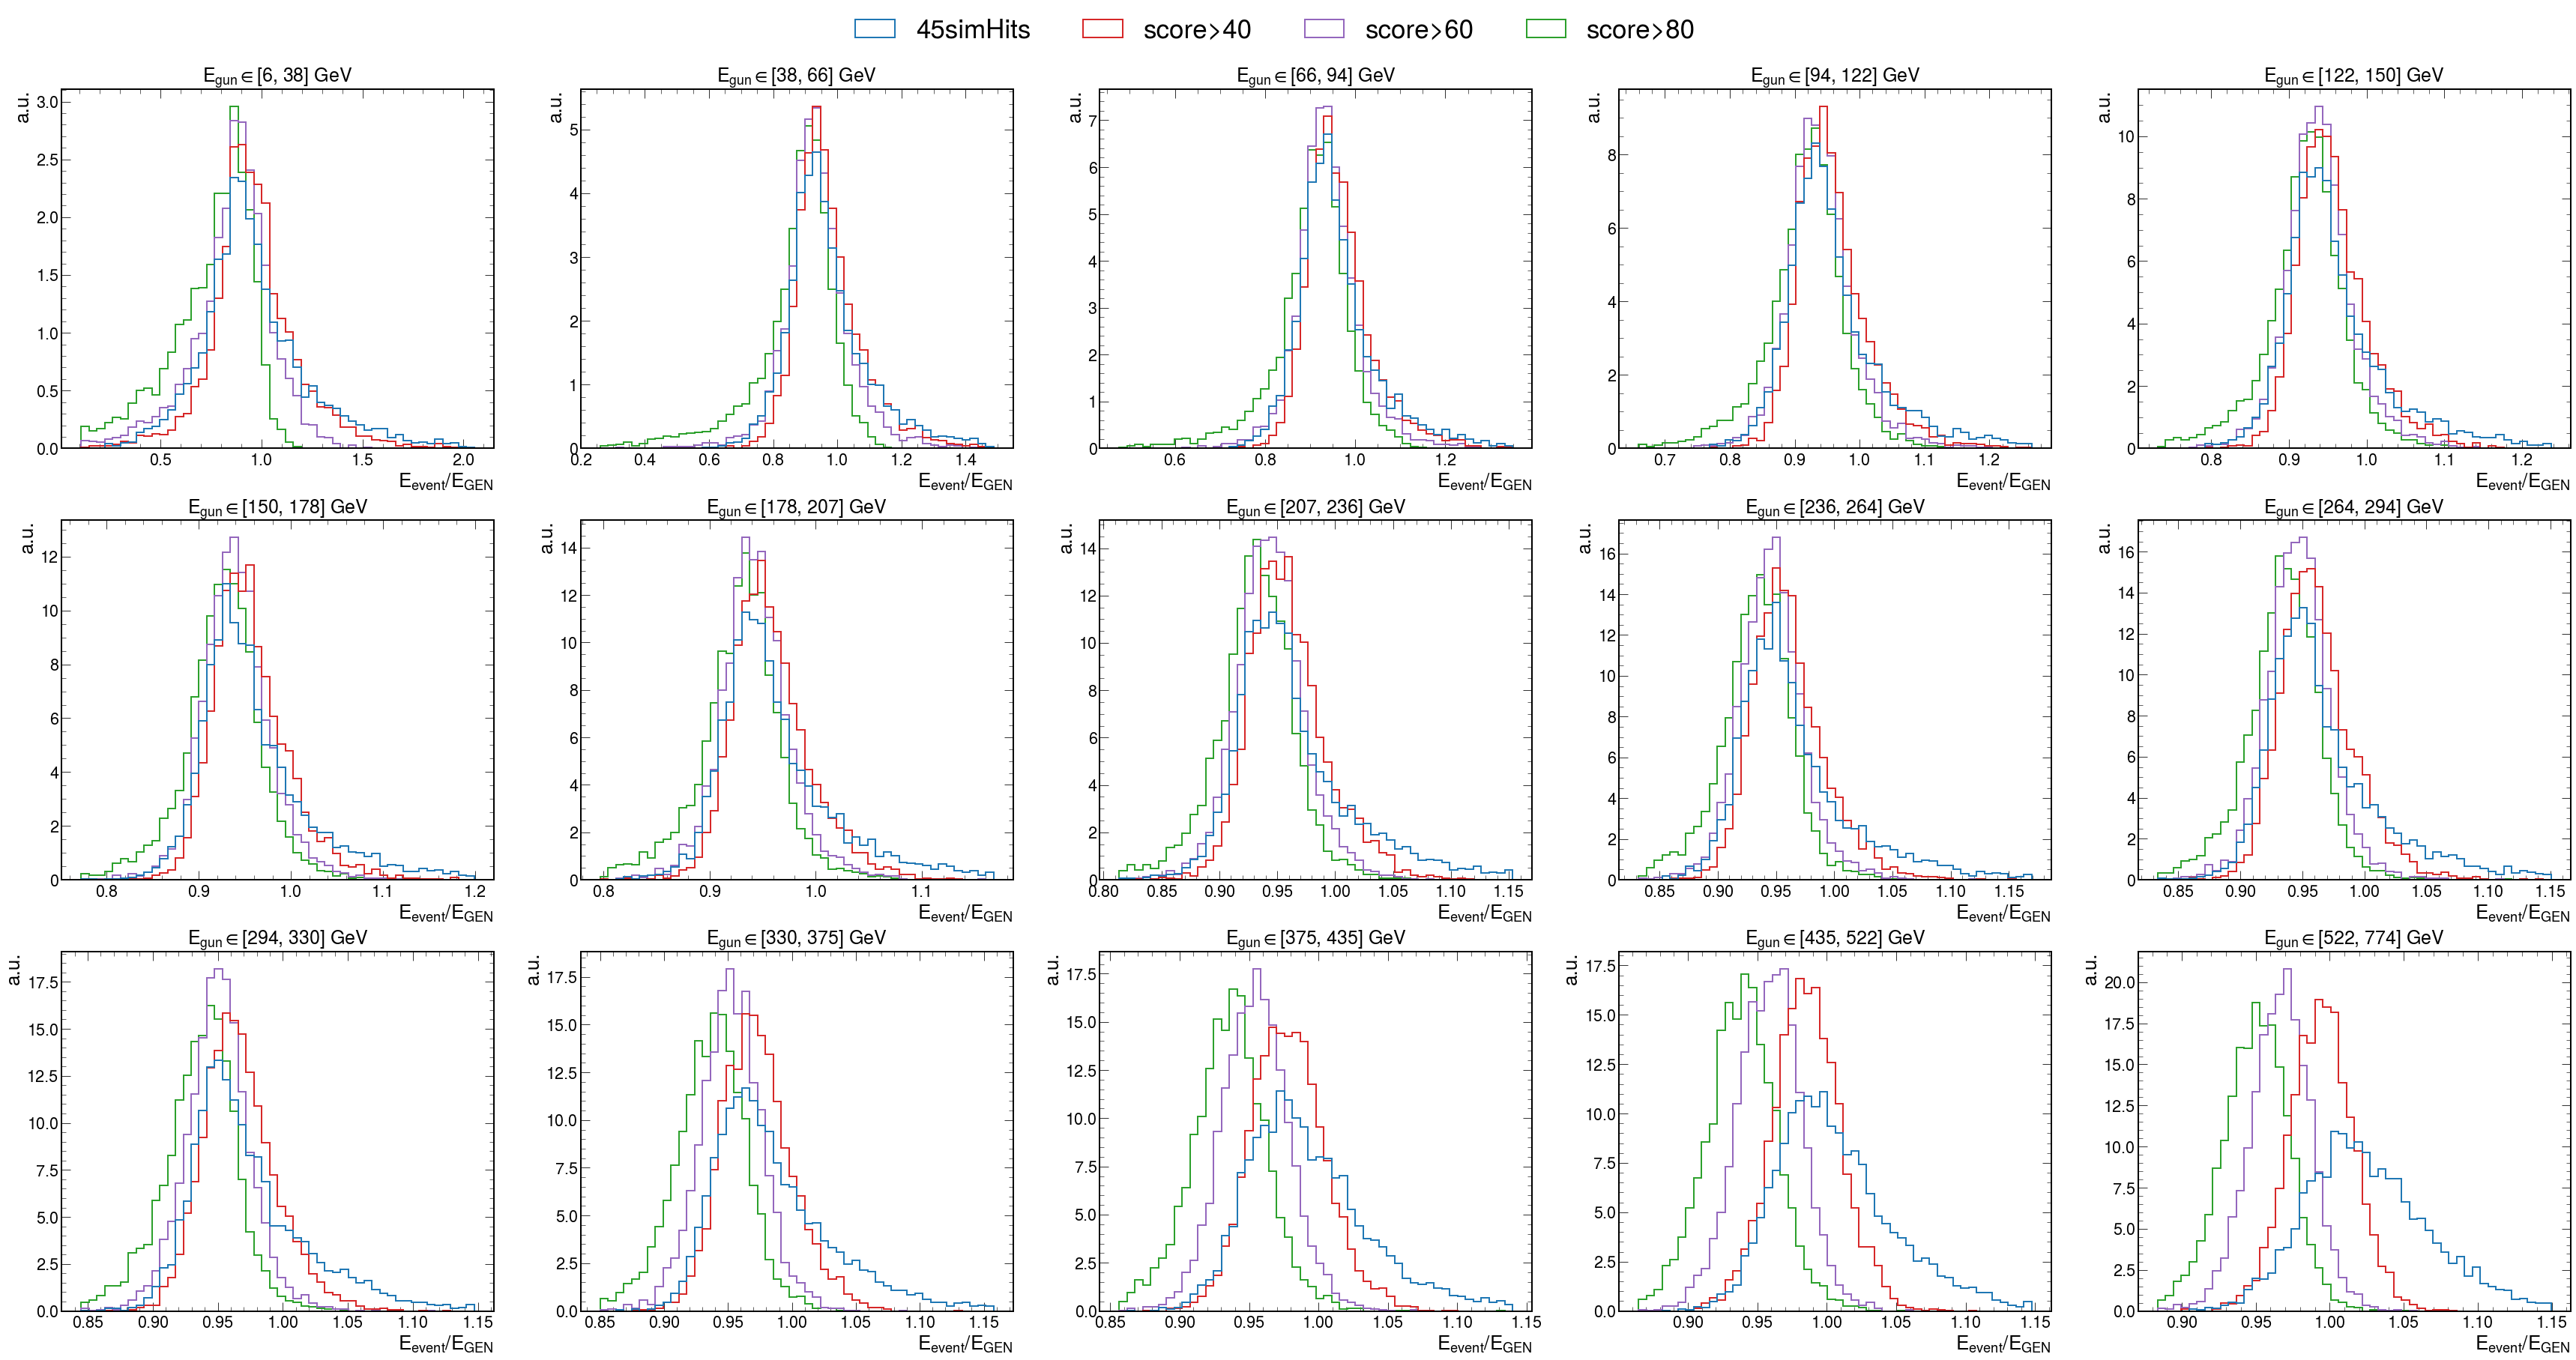

In [23]:
def makeEntries(_recoEn, _sel):
    lowPerc = 1
    upPerc = 99

    res      = (_recoEn/gun_en)
    entry    = res[_sel]
    entry    = entry[entry!=0] #To remove the events that are "killed" by the gen-Matching
    lowBound = np.percentile(entry,lowPerc)
    upBound  = np.percentile(entry,upPerc)
    
    return entry, lowBound, upBound

def makeResRatio(_recoEn, _sel):
    
    res = (_recoEn/gun_en)
    res = res[_sel]
    median = np.median( res )
    width  = np.percentile(res, 84.13) - np.percentile(res, 15.87)
    
    return width, median



fig, axs = plt.subplots(3, 5, figsize=(60,30))
axs = axs.ravel()

nBins = 50

resRatio = {key: [] for key in conds}
sigmas = {key: [] for key in conds}
meds = {key: [] for key in conds}

resRatio_skim = {key: [] for key in conds}
sigmas_skim = {key: [] for key in conds}
meds_skim = {key: [] for key in conds}


for i in range(len(bins)-1):
    # Energy selection defining the bin
    sel     = (gun_kin>bins[i])&(gun_kin<bins[i+1])
        
    entries      = []
    entries_skim = []
    lowBounds    = []
    upBounds     = []
    
    for cond in conds:
        
        out1, out2, out3 = makeEntries(recoEn[cond], sel)
        entries.append(out1)
        lowBounds.append(out2)
        upBounds.append(out3)
        sigma, med = makeResRatio(recoEn[cond], sel)
        sigmas[cond].append(sigma)
        meds[cond].append(med)
        resRatio[cond].append(sigma/med)
        
        out1, out2, out3 = makeEntries(recoEn_skim[cond], sel)
        entries_skim.append(out1)
        lowBounds.append(out2)
        upBounds.append(out3)
        sigma, med = makeResRatio(recoEn_skim[cond], sel)
        sigmas_skim[cond].append(sigma)
        meds_skim[cond].append(med)
        resRatio_skim[cond].append(sigma/med)
        

    lowBound = min(lowBounds)
    upBound = max(upBounds) 
    
    axs[i].hist(entries, 
                bins=nBins, 
                range=[lowBound,upBound], 
                label = conds,
                histtype='step', 
                lw=2, 
                linestyle = 'solid',
                color = colors,
                density=True)
    axs[i].set_xlabel(r'$E_{event}/E_{GEN}$')
    axs[i].set_ylabel('a.u.')

#     axs[i].hist(entries_skim, 
#                 bins=nBins, 
#                 range=[lowBound,upBound], 
#                 label = conds,
#                 histtype='step', 
#                 lw=1, 
#                 linestyle = 'dashed',
#                 color = colors,
#                 density=True)

    if binsType == 'en':
        axs[i].set_title(r'$E_{\rm gun}\in[$'+str(round(bins[i]))+', '+str(round(bins[i+1]))+'] GeV', fontsize=25)
    elif binsType == 'pt':
        axs[i].set_title(r'$p_{T,\rm{gun}}\in[$'+str(round(bins[i],2))+', '+str(round(bins[i+1],2))+'] GeV', fontsize=25)
    else:
        axs[i].set_title(r'$\eta_{\rm gun}\in[$'+str(round(bins[i],2))+', '+str(round(bins[i+1],2))+'] GeV', fontsize=25)
        


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(conds), fontsize=35)

plt.show()

In [90]:
def plotResolution(_recoEn, _genEn, _genKin, _bins, _bins_mean):
    
#     colors  = ['tab:blue', 'tab:red']
#     fmts    = ['o','s']
#     labels  = ['Before skimming', 'After skimming']
    
    fig = plt.figure(figsize=(10,7), dpi=85)
#     hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='')

    for idx, cond in enumerate(conds):
        y_axis_cleaned = []
        y_axis_err_lower = []
        y_axis_err_upper = []
        for index_b in range(len(bins)-1):
            genEnergy = _genEn[(_genKin > _bins[index_b]) & (_genKin < _bins[index_b+1])]
            recoEnergy = _recoEn[cond][(_genKin > _bins[index_b]) & (_genKin < _bins[index_b+1])]
            ratio = (recoEnergy/genEnergy)

            y_axis_cleaned.append(np.median(ratio))
            
            unc_low = np.percentile(ratio, 15.87)
            unc_upp = np.percentile(ratio, 84.13)
            y_axis_err_lower.append(abs(unc_low-np.median(ratio)))
            y_axis_err_upper.append(abs(unc_upp-np.median(ratio)))

        plt.errorbar(_bins_mean, y_axis_cleaned, yerr=[y_axis_err_lower,y_axis_err_upper], color=colors[idx], capsize=3, label=conds[idx], fmt='o') 
    plt.ylabel('($E_{event}/E_{GEN}$', loc='center')
    if binsType == 'en':
        plt.xlabel('$E_{GEN}$ [GeV]', loc='center')
    elif binsType == 'pt':
        plt.xlabel('$p_{T,GEN}$ [GeV]', loc='center')
    else:
        plt.xlabel('$\eta_{GEN}$ [GeV]', loc='center')
#     plt.ylim([-0.6,0.2])
    plt.axhline(1,color='black',ls='--')
    plt.legend(title=r'$\bf{PU = 200}$', loc = 'best', frameon=True, ncol=2)._legend_box.align = "left"
#     plt.savefig('energy_resolution_diff.pdf', dpi=100, bbox_inches='tight')
    plt.show()


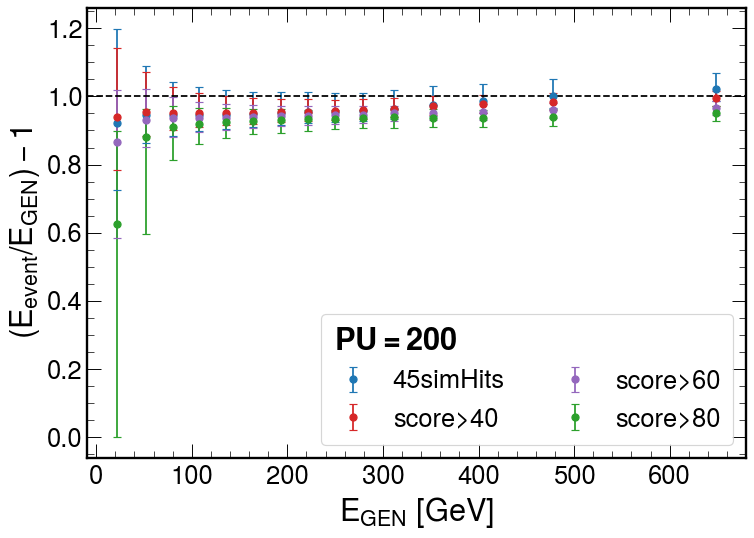

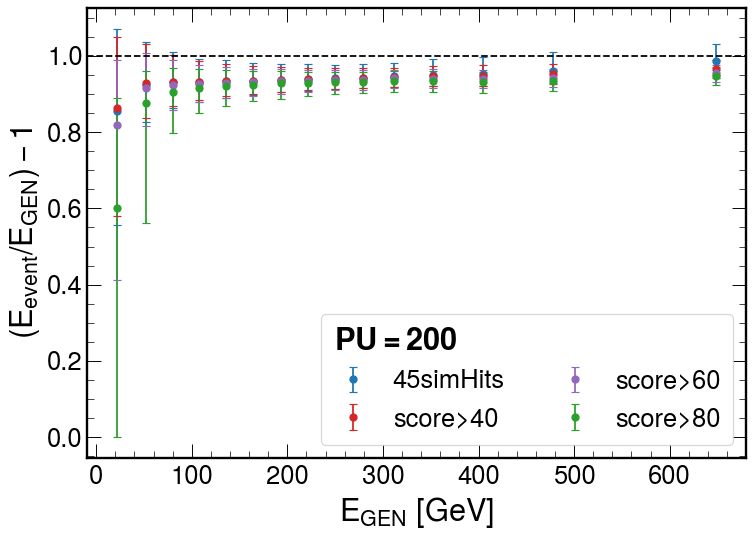

In [805]:
bins_mean = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

plotResolution(recoEn,
               gun_en,
               gun_kin,
               bins,
               bins_mean)

plotResolution(recoEn_skim,
               gun_en,
               gun_kin,
               bins,
               bins_mean)


In [158]:
def cruijff(x, A, m, sigmaL,sigmaR, alphaL, alphaR):
    dx = (x-m)
    SL = np.full(x.shape, sigmaL)
    SR = np.full(x.shape, sigmaR)
    AL = np.full(x.shape, alphaL)
    AR = np.full(x.shape, alphaR)
    sigma = np.where(dx<0, SL,SR)
    alpha = np.where(dx<0, AL,AR)
    f = 2*sigma*sigma + alpha*dx*dx ;
    return A* np.exp(-dx*dx/f) 


def computeResFit(x_data, special = False, plot = False):
    nbins = 40
#     x_data = res_clean_vec['v4'][2]
    mean = np.median(x_data)
#     std = np.std(x_data)
    std = np.percentile(x_data, 84.13) - np.percentile(x_data, 15.87)
#     rangea = [mean-1.8*std, mean+1.8*std] ## This is for the plot Valsecchi style
    rangea = [mean-3*std, mean+3*std]
    if special:
        nbins = 50
        rangea = [0.6,3]
    hist, bin_edges = np.histogram(x_data, bins=nbins, range=rangea)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Gaussian least-square fitting process
#     param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,std],maxfev=10000)
    
    x_hist = x_hist[y_hist>0]
    y_hist = y_hist[y_hist>0]
    param_optimised,param_covariance_matrix = curve_fit(cruijff, x_hist, y_hist, p0=[np.max(y_hist), mean, std, std,  0.15, 0.15], sigma=np.sqrt(y_hist),absolute_sigma=True, maxfev=50000)
    perr = np.sqrt(np.diag(param_covariance_matrix))
    
    if plot:
        x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
    #     axs[b].plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
        plt.plot(x_hist_2,cruijff(x_hist_2,*param_optimised),'r.:',label='Fit')
        plt.legend()

        #Normalise the histogram values
        weights = np.ones_like(x_data) / len(x_data)
        plt.hist(x_data, weights=weights, bins=nbins, range=rangea)

        #setting the label,title and grid of the plot
        plt.xlabel('$E_{supercluster}/E_{GEN}$')
        plt.ylabel("a.u.")
        plt.grid("on")
        plt.show()


#     return [param_optimised[1], param_optimised[2]]
    return [param_optimised[1], param_optimised[2], param_optimised[3], perr[1], perr[2], perr[3]]

In [61]:
bins

array([  5.75564146,  45.06271617,  79.72117615, 115.01829529,
       149.94904073, 185.20407104, 221.34280396, 256.28623454,
       293.77084351, 340.18762207, 403.52742513, 493.46768188,
       774.48797607])

In [214]:
bins_mean = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

mus = {}
sigmas = {}
res = {}
mus_err = {}
sigmas_err = {}
res_err = {}

for idx, cond in enumerate(conds):
    print(cond)
    mus[cond] = []
    sigmas[cond] = []
    res[cond] = []
    mus_err[cond] = []
    sigmas_err[cond] = []
    res_err[cond] = []
    for b in range(len(bins)-1):
        sel = (gun_pt > bins[b]) & (gun_pt < bins[b+1])
        ratio = recoEn[cond][sel]/gun_en[sel]
        fit = computeResFit(ratio)
        mu = fit[0]
        sigma = (abs(fit[1]) + abs(fit[2]))/2
        mu_err = fit[3]
        sigma_err = 0.5 * np.sqrt(fit[4]**2 + fit[5]**2)
        res_err_tmp = (sigma / mu) * np.sqrt( (sigma_err/sigma)**2 + (mu_err/mu)**2 )
        
        mus[cond].append(mu)
        sigmas[cond].append(sigma)
        res[cond].append(sigma / mu)
        mus_err[cond].append(mu_err)
        sigmas_err[cond].append(sigma_err)
        res_err[cond].append(res_err_tmp)


45simHits
score>40
score>50


/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/llr/cms/tarabini/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


score>60
score>70
score>80


In [138]:
def resolution(x,a,b,c):
    return a/np.sqrt(x) + b/x + c 


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


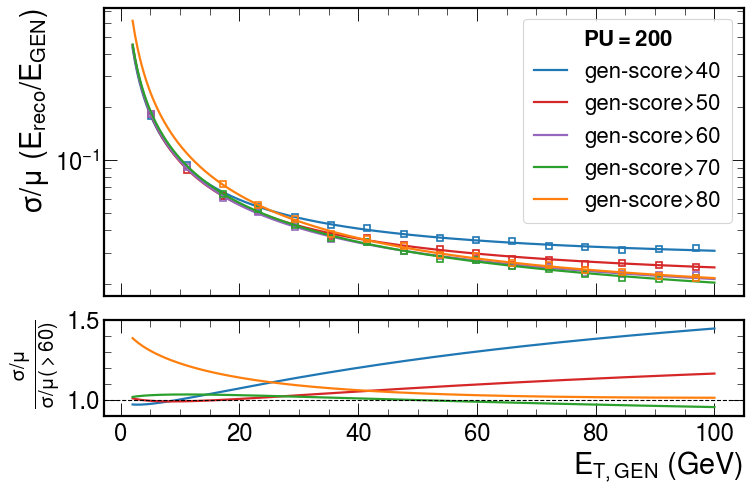

In [281]:
bins_mean = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
bins_width = [(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]

fig = plt.figure(figsize=(10,6), dpi=80)
frame1 = fig.add_axes((.1, .35, .8, .6))
fit_points = {}
for idx,cond in enumerate(conds[1:]):
#     plt.plot(bins_mean, resRatio[cond], 'o-', label=cond, color=colors[idx])
#     plt.plot(bins_mean, resRatio_skim[cond], 'o-', label=cond, color=colors[idx])
    if cond == 'score>80' or cond=='score>70':
        plt.plot(bins_mean[2:], res[cond][2:], 's', color=colors[idx], mfc='none', markersize=6, mew=1.5)
#         plt.errorbar(bins_mean[1:], res[cond][1:], xerr = bins_width[1:], fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors[idx], label=cond)
        param_optimised,param_covariance_matrix = curve_fit(resolution, bins_mean[2:], res[cond][2:], p0=[1,1,1],absolute_sigma=True, maxfev=50000)
        x=np.linspace(2,100,500)
        fit_points[cond] = (resolution(x,*param_optimised))
        plt.plot(x,resolution(x,*param_optimised), color=colors[idx], label='gen-'+cond, lw=2)
    else:
        plt.plot(bins_mean, res[cond], 's', color=colors[idx], mfc='none', markersize=6, mew=1.5)
#         plt.errorbar(bins_mean, res[cond], xerr = bins_width, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors[idx], label=cond)
        param_optimised,param_covariance_matrix = curve_fit(resolution, bins_mean, res[cond], p0=[1,1,1],absolute_sigma=True, maxfev=50000)
        x=np.linspace(2,100,500)
        fit_points[cond] = (resolution(x,*param_optimised))
        plt.plot(x,resolution(x,*param_optimised), color=colors[idx], label='gen-'+cond, lw=2)
        
plt.yscale('log')
plt.legend(ncol=1, frameon=True, loc='upper right', title=r'$\bf{PU = 200}$', fontsize=20, title_fontsize=20)
plt.ylabel(r'$\sigma/\mu$ ($E_{reco}/E_{GEN}$)')

frame1.set_xticklabels([])
frame2 = fig.add_axes((.1,.1,.8,.2))

for idx,cond in enumerate(conds[1:]):
    if cond=='score>60': continue
    plt.plot(x,fit_points[cond]/fit_points['score>60'], color=colors[idx], label=cond, lw=2)
plt.axhline(y=1, color='black', ls='--', lw=1)
    
if binsType == 'en':
    plt.xlabel(r'$E_{\rm gun}$ [GeV]')
elif binsType == 'pt':
    plt.xlabel(r'$E_{T, \rm GEN}$ (GeV)')
else:
    plt.xlabel(r'$\eta_{\rm gun}$ [GeV]')
plt.ylabel(r'$\frac{\sigma/\mu}{\sigma/\mu(>60)}$')
plt.ylim([0.9, 1.5])
# plt.yscale('log')
# plt.semilogy()

plt.savefig('energy_resolution_genmatching.pdf', dpi=100, bbox_inches='tight')
plt.show()

# Variation in each kinematic bin

In [785]:
enBins = histedges_equalN(gun_en, 15)
etaBins = histedges_equalN(abs(gun_eta), 15)
ptBins = histedges_equalN(gun_pt, 15)

# bins = enBins
# binsType = 'en'
# gun_kin = gun_en

# bins = etaBins
# binsType = 'eta'
# gun_kin = abs(gun_eta)

bins = ptBins
binsType = 'pt'
gun_kin = gun_pt

In [810]:
def makeScorePlots(_var, _var_skim, _label):
    fig, axs = plt.subplots(3, 5, figsize=(60,20))
    axs = axs.ravel()
    for i in range(len(bins)-1):
        x = [int(string[6:]) for string in conds_setup[startingPoint:]]
        y = [_var[key][i] for key in _var]
        axs[i].plot(x, y, 'o-', lw=2, color='tab:blue', label='skimOFF')
        y = [_var_skim[key][i] for key in _var_skim]
        axs[i].plot(x, y, 'o:', lw=2, color='tab:blue', label='skimON')
        axs[i].set_ylabel(_label)
        axs[i].set_xlabel('Score cut')
#         axs[i].set_ylim([-4,0])

        if binsType == 'en':
            axs[i].set_title(r'$E_{\rm gun}\in[$'+str(round(bins[i]))+', '+str(round(bins[i+1]))+'] GeV', fontsize=25)
        elif binsType == 'pt':
            axs[i].set_title(r'$p_{T,\rm{gun}}\in[$'+str(round(bins[i],2))+', '+str(round(bins[i+1],2))+'] GeV', fontsize=25)
        else:
            axs[i].set_title(r'$\eta_{\rm gun}\in[$'+str(round(bins[i],2))+', '+str(round(bins[i+1],2))+'] GeV', fontsize=25)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=len(conds), fontsize=35)

    plt.show() 

/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


#####----- Resolution -----#####


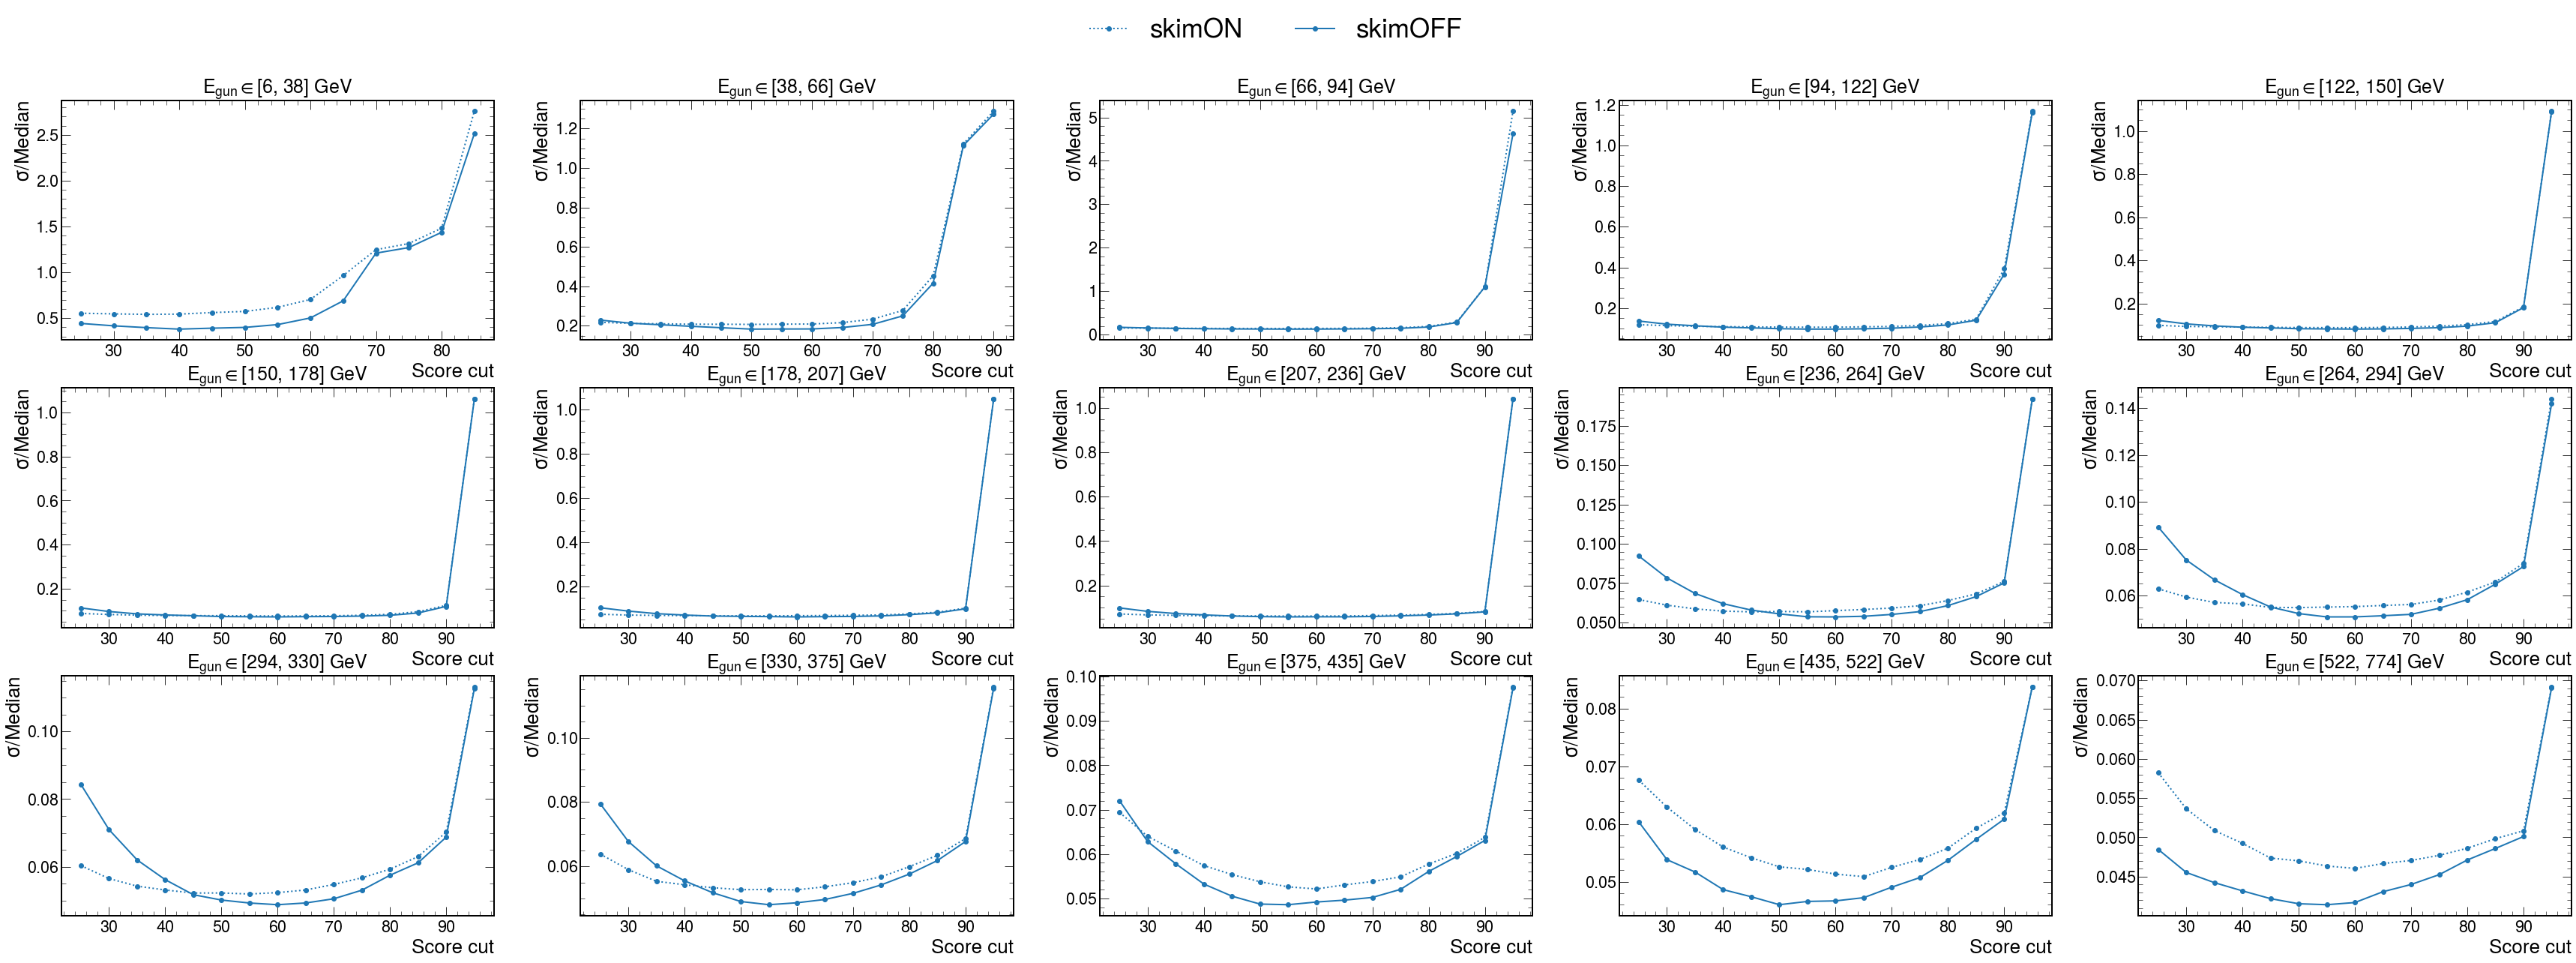

#####----- Median -----#####


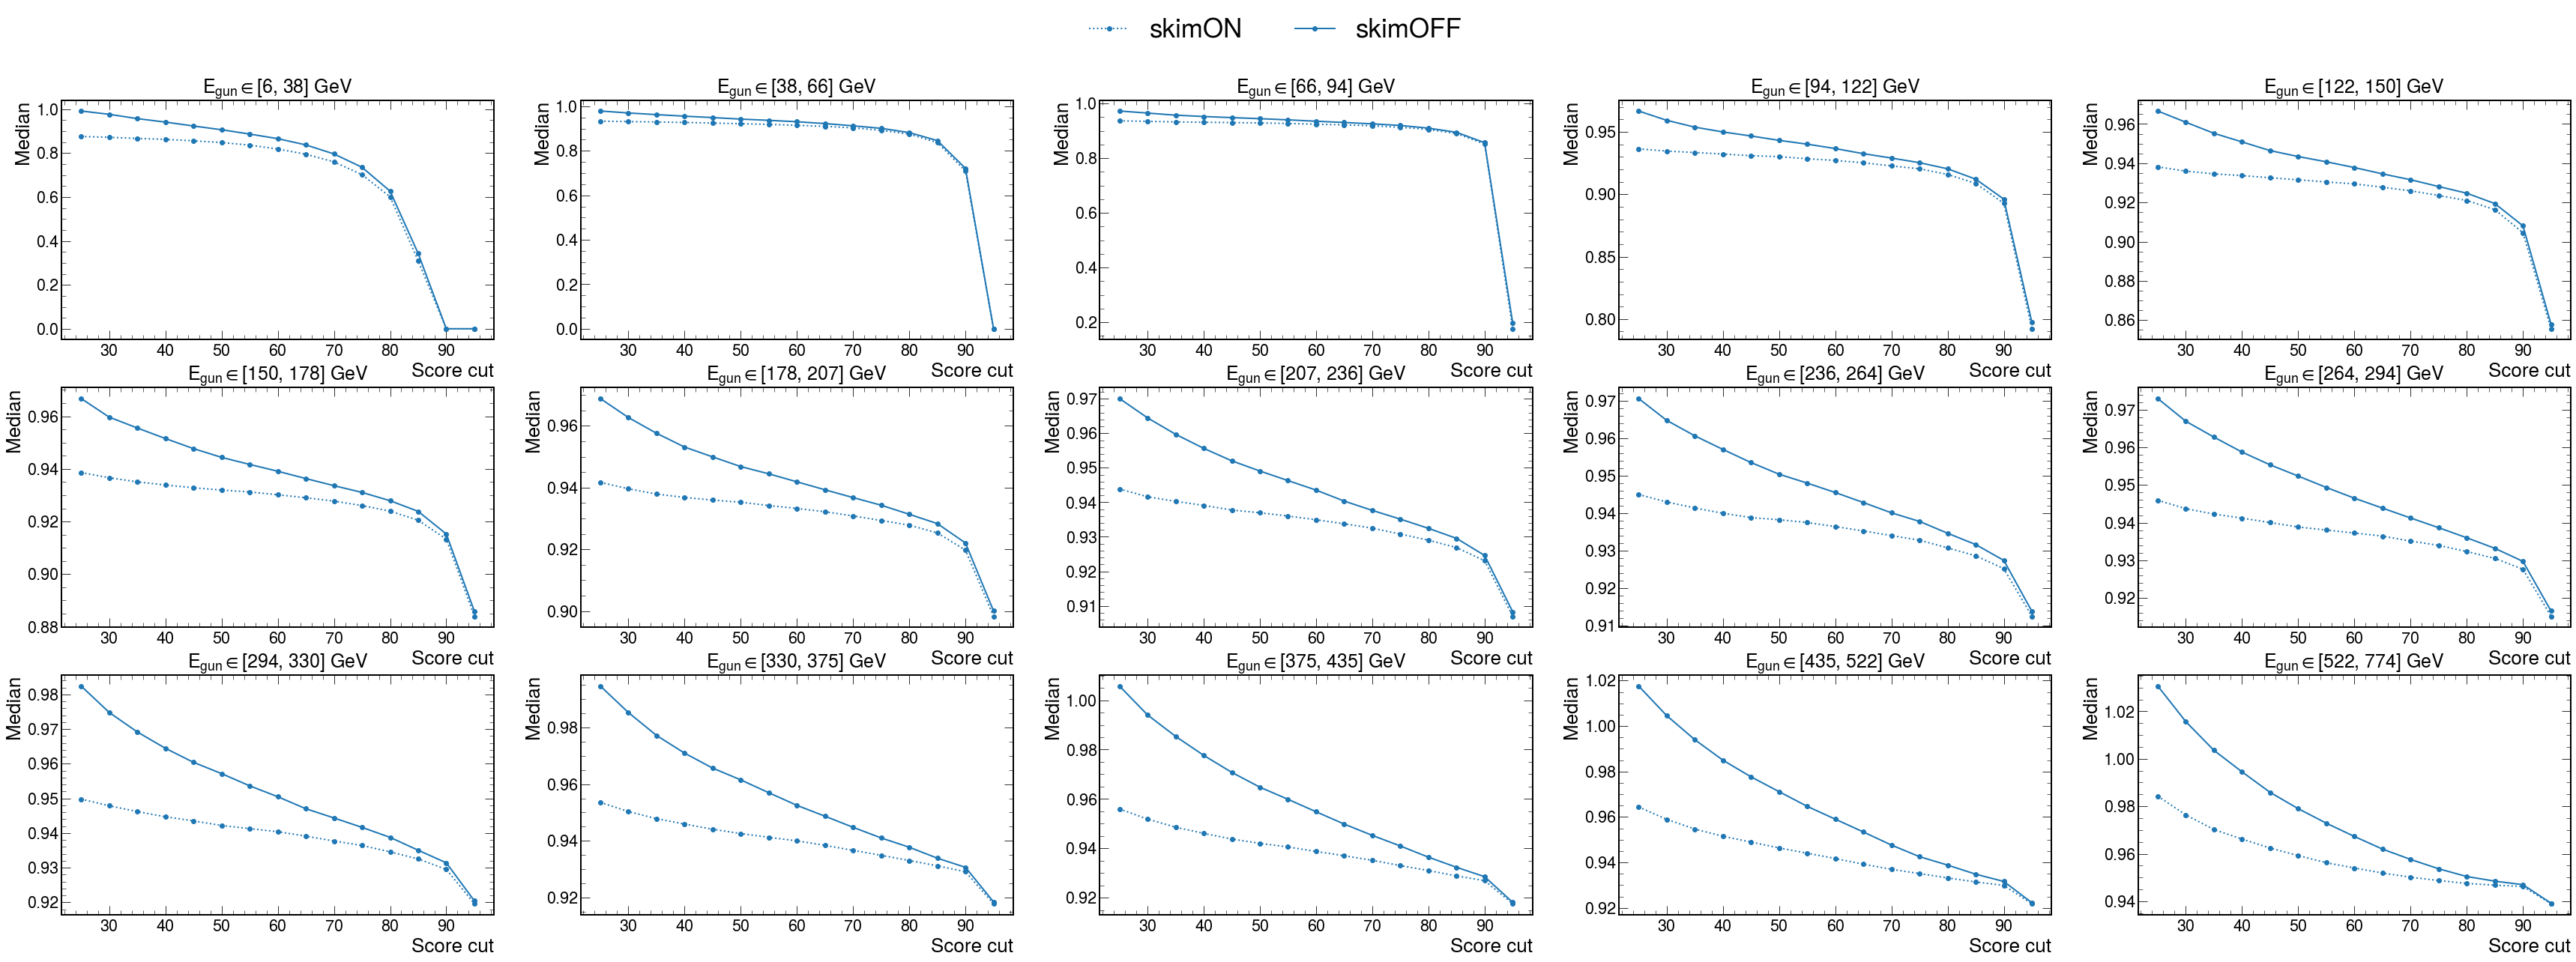

#####----- Width -----#####


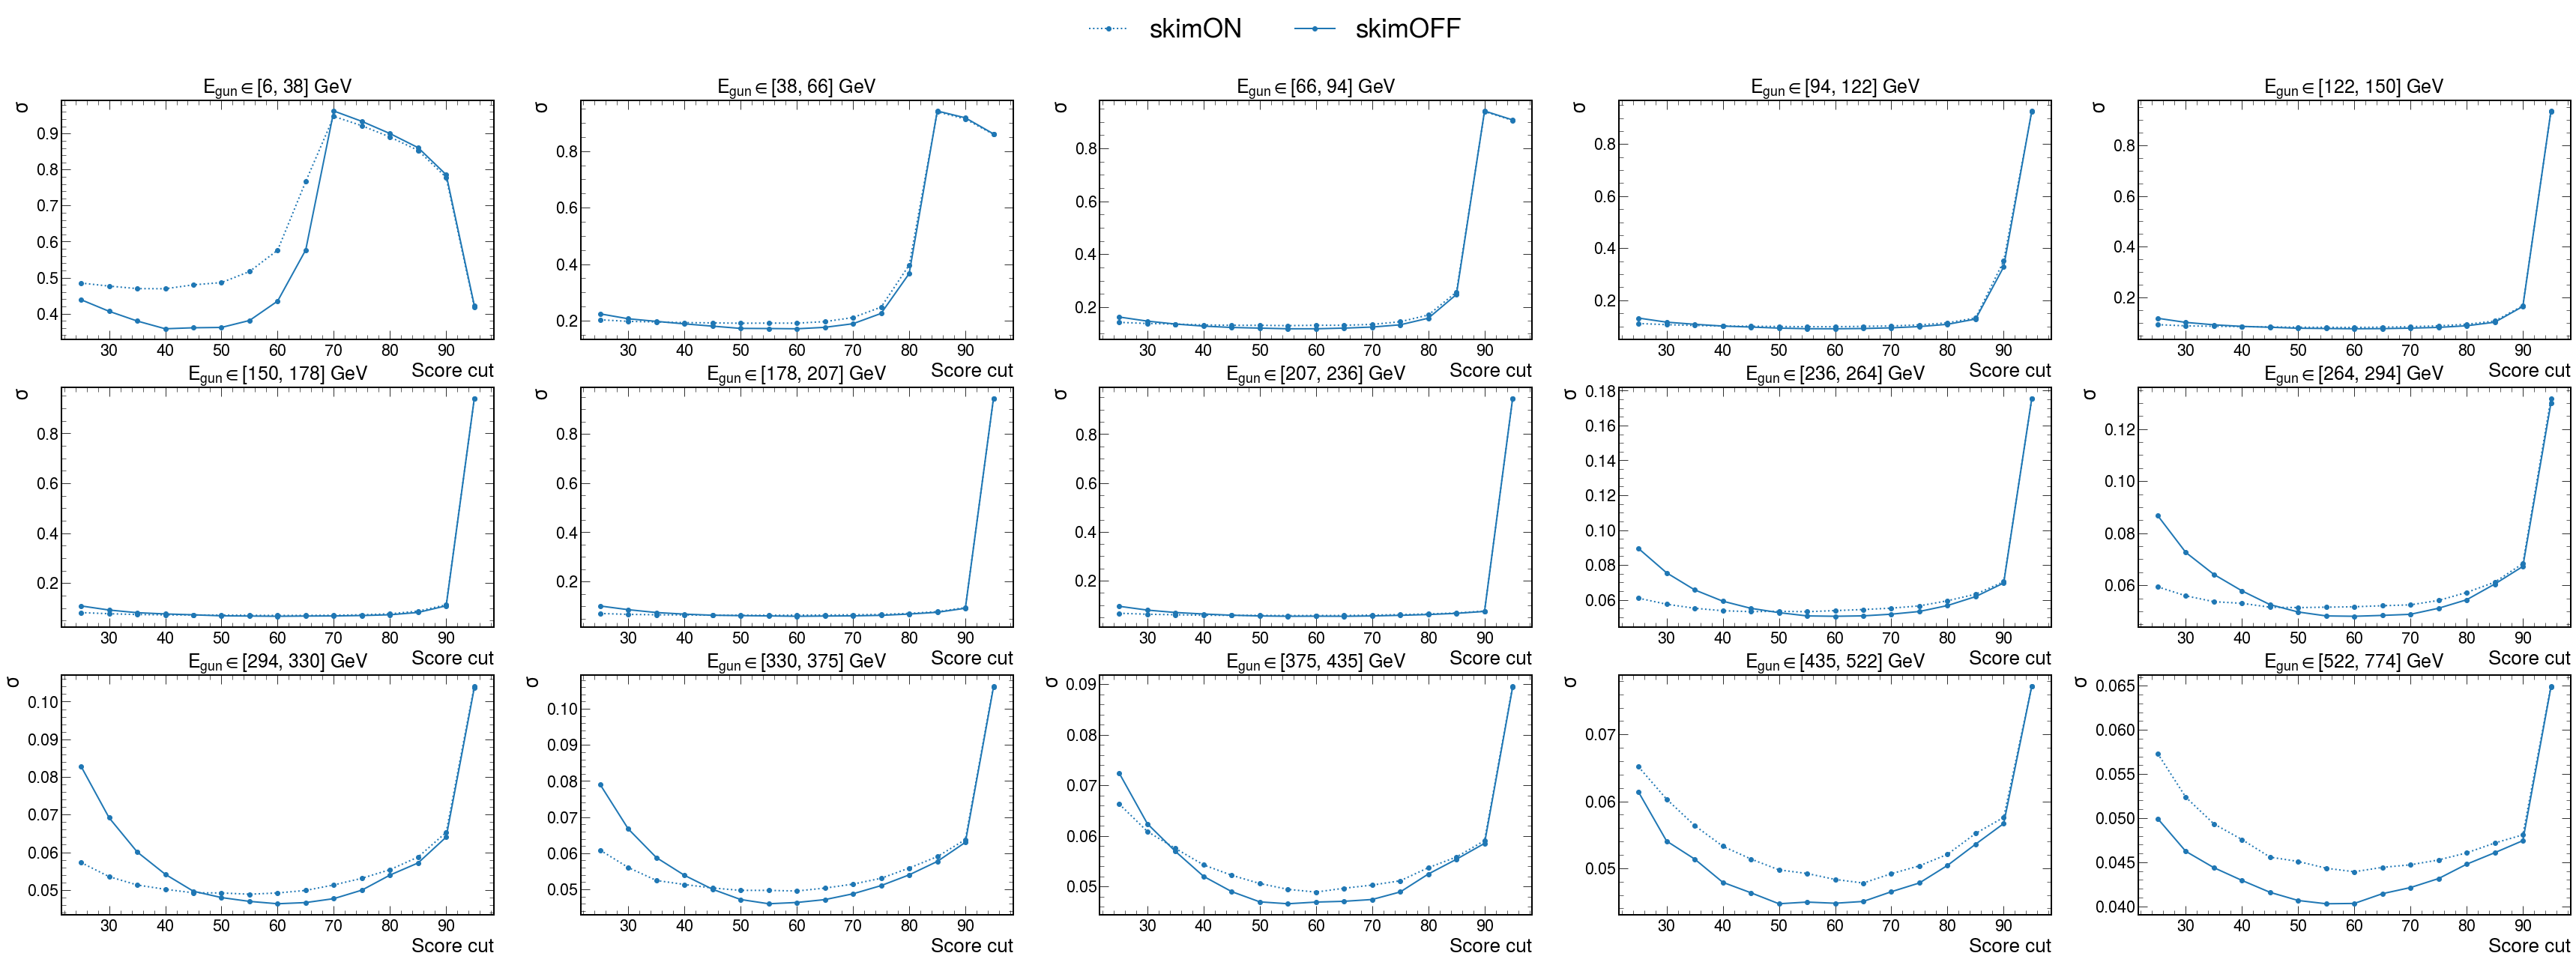

#####----- Skewness -----#####


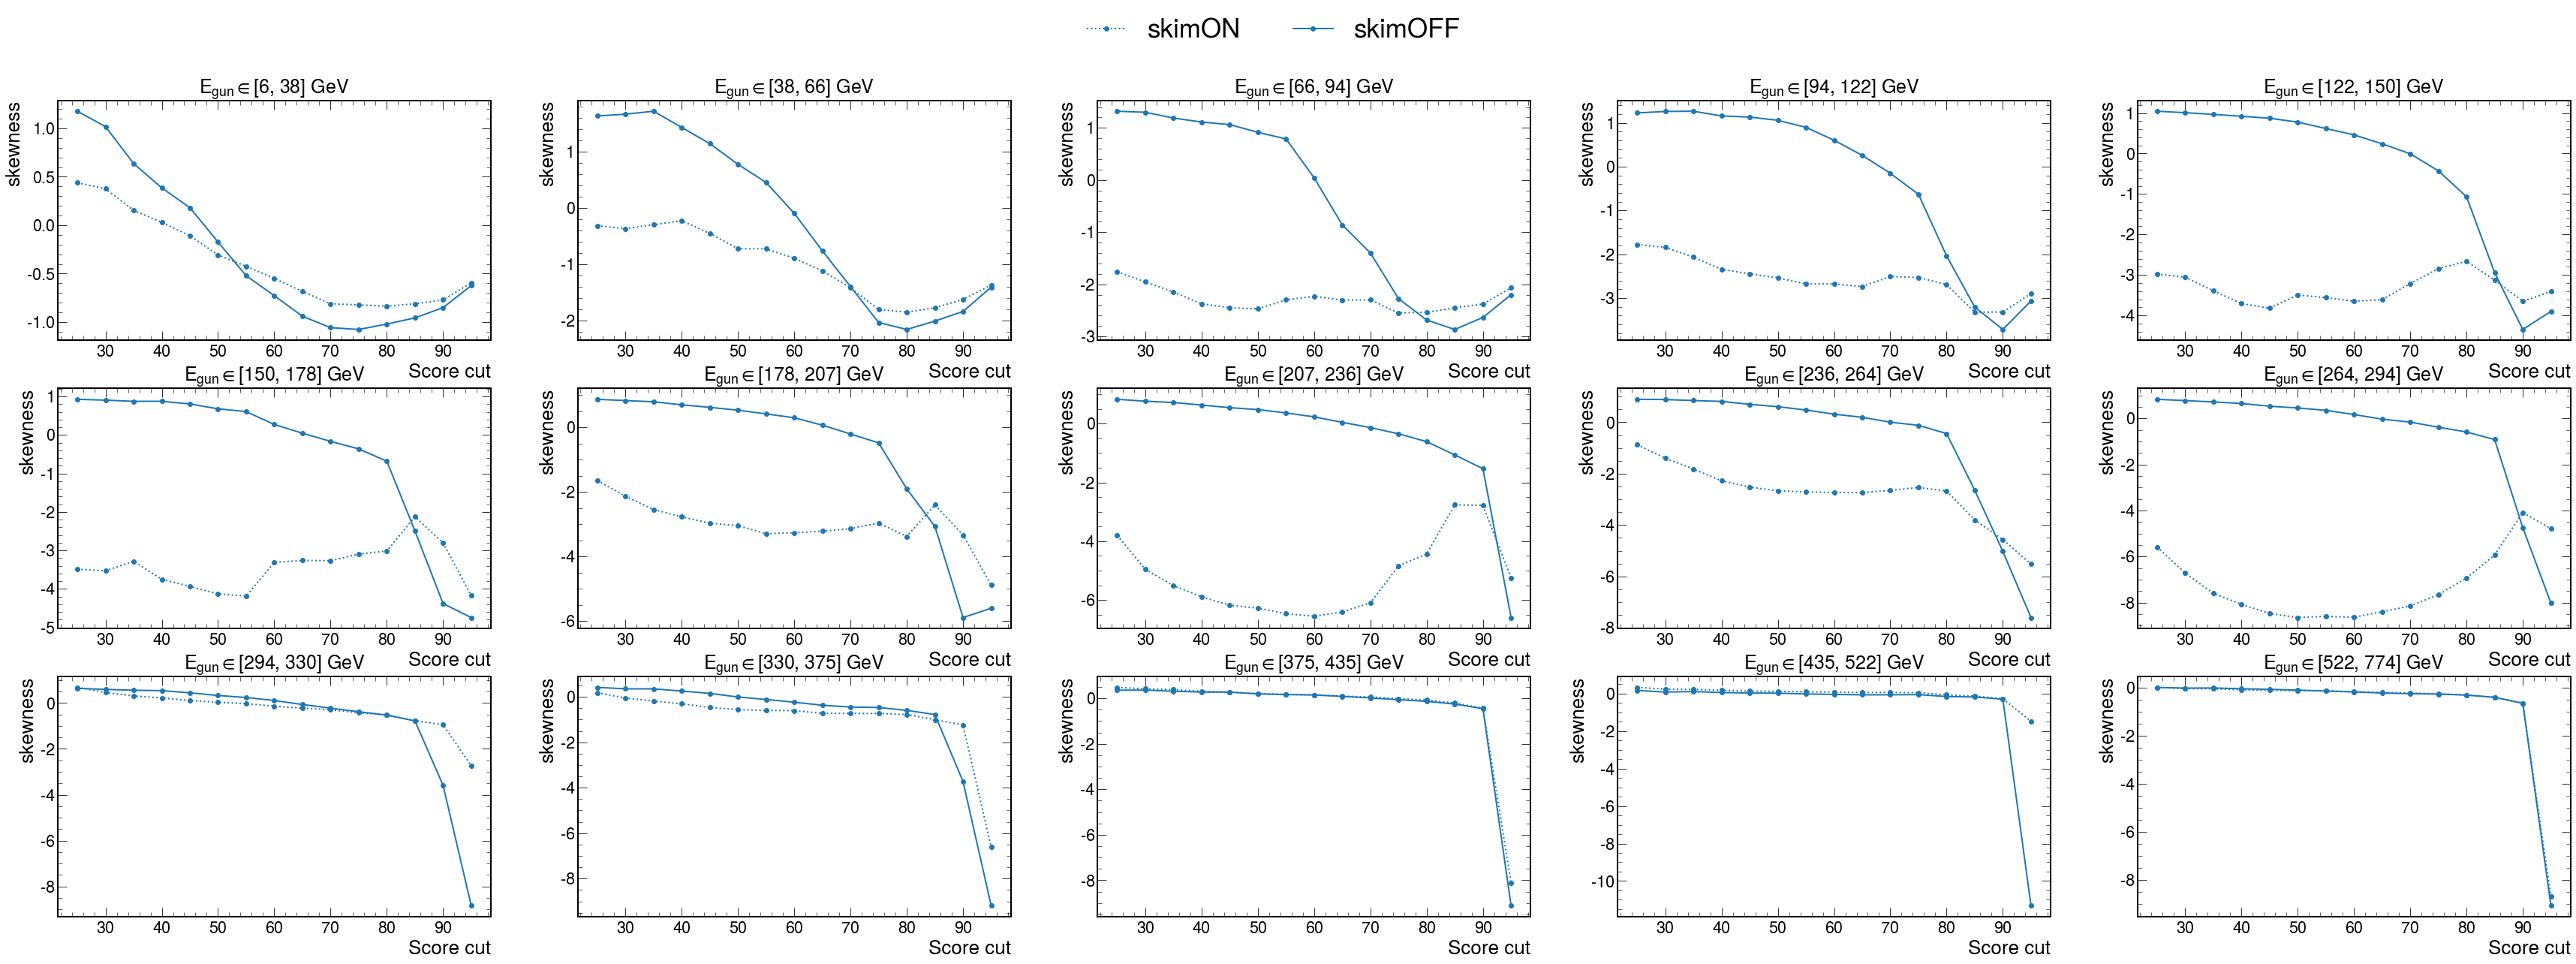

#####----- Kurtosis -----#####


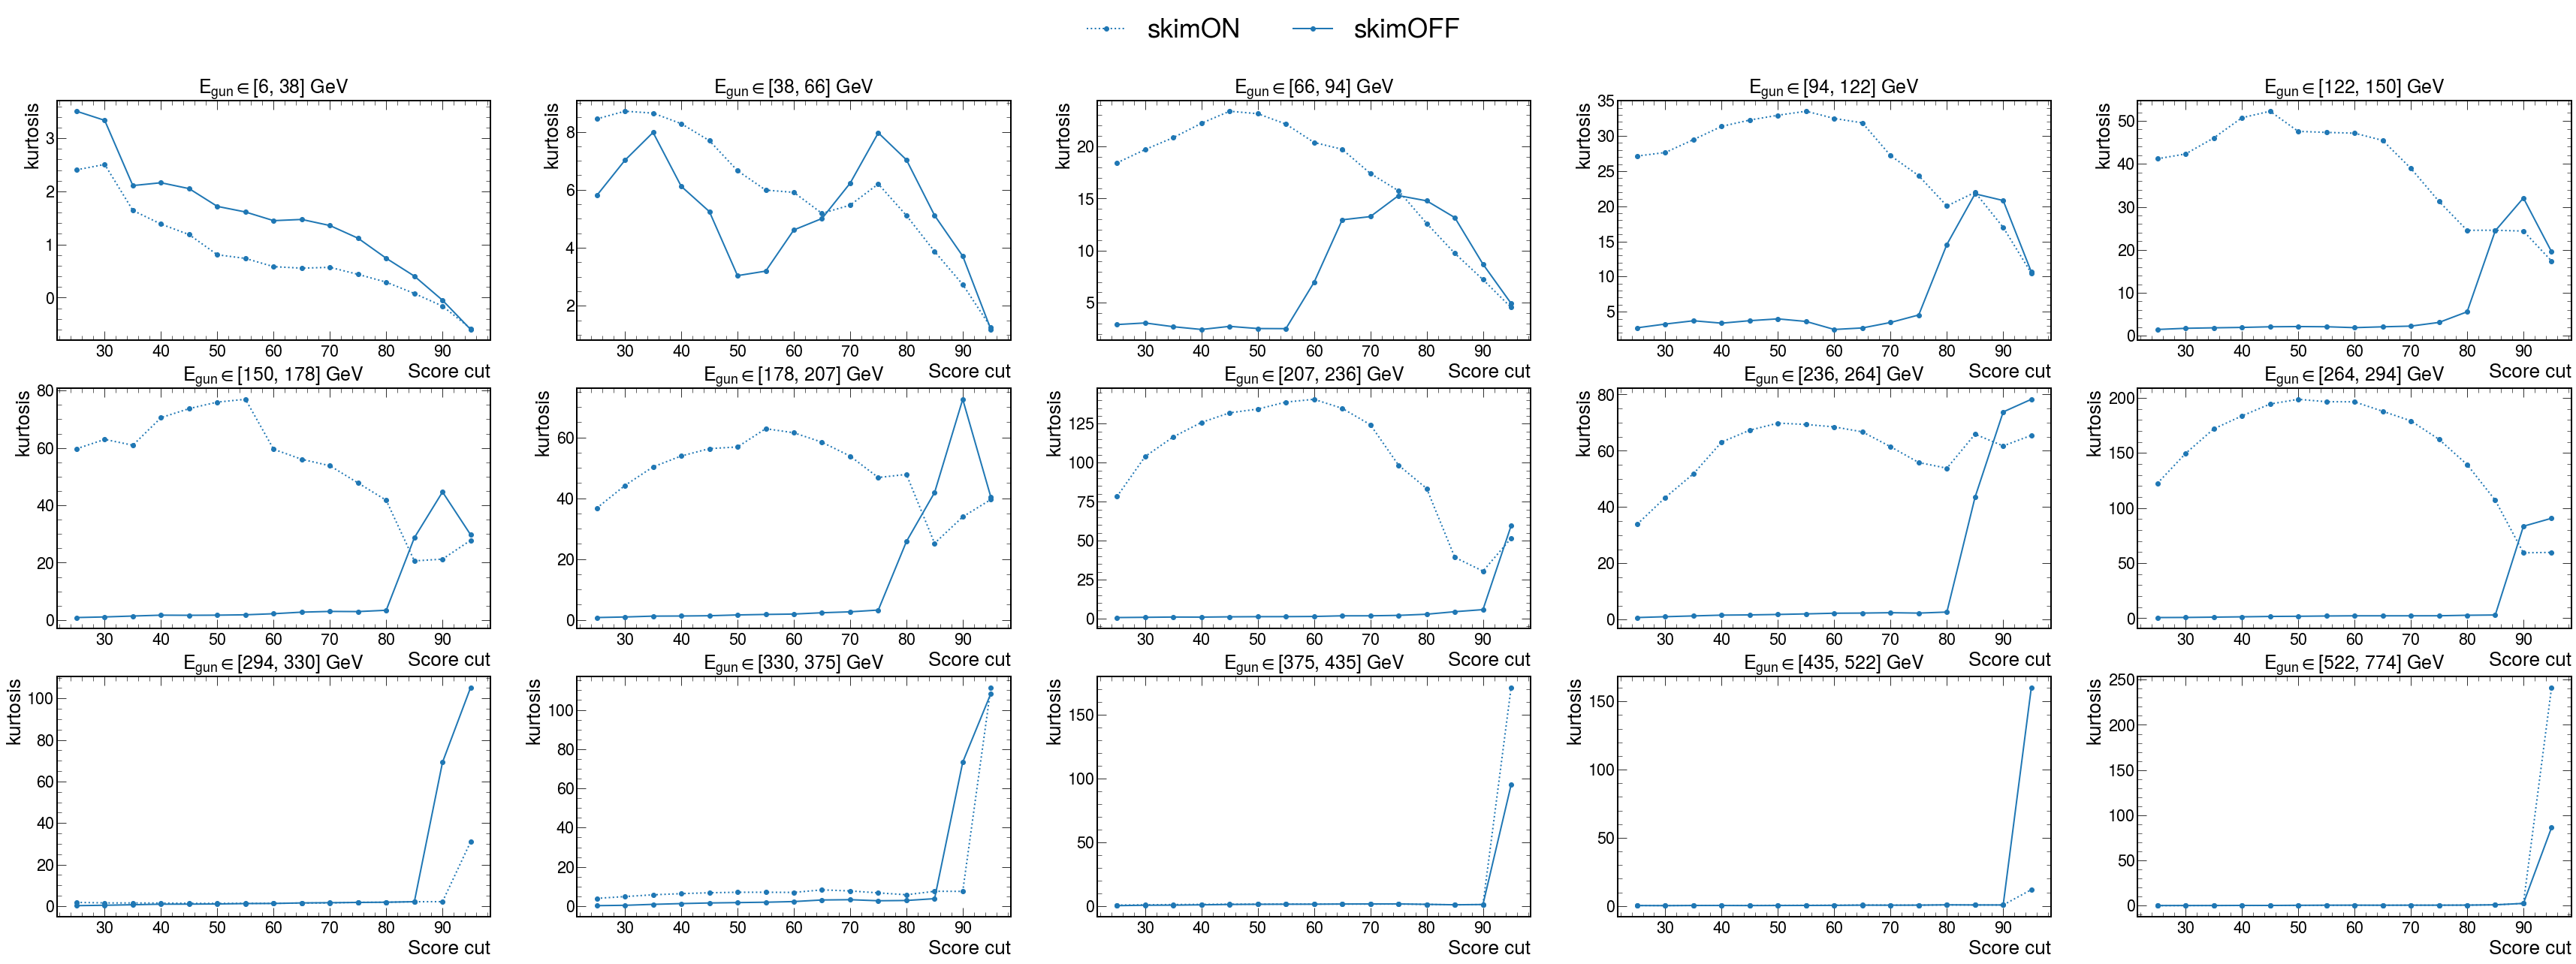

In [811]:
startingPoint = 2

resRatio = {key: [] for key in conds_setup[startingPoint:]}
sigmas = {key: [] for key in conds_setup[startingPoint:]}
meds = {key: [] for key in conds_setup[startingPoint:]}
skews = {key: [] for key in conds_setup[startingPoint:]}
kurts = {key: [] for key in conds_setup[startingPoint:]}

resRatio_skim = {key: [] for key in conds_setup[startingPoint:]}
sigmas_skim = {key: [] for key in conds_setup[startingPoint:]}
meds_skim = {key: [] for key in conds_setup[startingPoint:]}
skews_skim = {key: [] for key in conds_setup[startingPoint:]}
kurts_skim = {key: [] for key in conds_setup[startingPoint:]}

for i in range(len(bins)-1):
    # Energy selection defining the bin
    sel     = (gun_kin>bins[i])&(gun_kin<bins[i+1])
            
    for cond in conds_setup[startingPoint:]:
        
        entries, _, __ = makeEntries(recoEn[cond], sel)
        sigma, med = makeResRatio(recoEn[cond], sel)
        sigmas[cond].append(sigma)
        meds[cond].append(med)
        resRatio[cond].append(sigma/med)
        skews[cond].append(skew(entries))
        kurts[cond].append(kurtosis(entries))
        
        entries, _, __ = makeEntries(recoEn_skim[cond], sel)
        sigma, med = makeResRatio(recoEn_skim[cond], sel)
        sigmas_skim[cond].append(sigma)
        meds_skim[cond].append(med)
        resRatio_skim[cond].append(sigma/med)
        skews_skim[cond].append(skew(entries))
        kurts_skim[cond].append(kurtosis(entries))

print('#####----- Resolution -----#####')
makeScorePlots(resRatio, resRatio_skim, r'$\sigma/Median$')
print('#####----- Median -----#####')
makeScorePlots(meds, meds_skim, r'Median')
print('#####----- Width -----#####')
makeScorePlots(sigmas, sigmas_skim, r'$\sigma$')
print('#####----- Skewness -----#####')
makeScorePlots(skews, skews_skim, r'skewness')
print('#####----- Kurtosis -----#####')
makeScorePlots(kurts, kurts_skim, r'kurtosis')


# SingleEvent

In [54]:
def eventDisplay(_ele, cleaned = False, multi = False, removeTrk = False):
    
    print('------- Event information -------') 
    print('event, sample, eta:', _ele.eventNumber, _ele.sampleNumber, _ele.etaSign)

    # --------- gun information ---------
    print('------- Gun information -------') 
    print('eta gun:',  round(_ele.gunEta,3)) 
    print('phi gun:',  round(_ele.gunPhi,3))
    print('En gun:',   round(_ele.gunEn,3))
    print('ID gun:',   _ele.gunPID) 
    print('pT gun:',   round(_ele.gunPt,3))
    
    # --------- tracksters information ---------
#     print('------- Tracksters information -------') 
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']
#     print('color    energy     ratio_maxE     ratio_sumE     explVarRatio    discarded')
#     print('color    energy     explVarRatio    discarded')
#     seedIdx = np.argmax(_ele.multi_pt)
#     for trk in range(len(_ele.multi_en)):
#         # color, energy, ratio wrt to most energetic one, explained variance, skimming
#         print(colors[trk][4:],  
#               ' - energy:', round(_ele.multi_en[trk],3),
#               ' - eta:',    round(_ele.multi_eta[trk],3), 
#               ' - phi:',    round(_ele.multi_phi[trk],3), 
#               ' - pt:',     round(_ele.multi_pt[trk],3), 
#               ' - dEta:',   round(abs(_ele.multi_eta[trk]) - abs(_ele.multi_eta[seedIdx]) ,3), 
#               ' - dPhi:',   round(_ele.multi_phi[trk] - _ele.multi_phi[seedIdx], 3), 

# #               str(round((_ele.multi_en[trk] / max(_ele.multi_en)) * 100,2))+'%', '    ', 
# #               str(round((_ele.multi_en[trk] / sum(_ele.multi_en)) * 100,2))+'%', '        ', 
#               '   ', round(_ele.wpca_explVarRatio[trk],3), '   ', 
#               '   ', abs(abs(_ele.multi_eta[trk]) - abs(_ele.multi_eta[seedIdx])) > 0.05 and abs(_ele.multi_phi[trk] - _ele.multi_phi[seedIdx])<0.05 and abs(_ele.multi_phi[trk] - _ele.multi_phi[seedIdx])>0, '    ',
#               _ele.skim[trk])
#     if removeTrk:
#         print('------- Effects of the skimming -------') 
#         print('E_ev/E_GEN', (sum(_ele.multi_en) / _ele.gunEn) - 1 )
#         print('E_ev/E_GEN', (sum(_ele.multi_en[_ele.skim==False]) / _ele.gunEn) - 1  )
    
    
    enMultiplier = 30
    
    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(42,17))

    genmatch = (_ele.genMatching == 1) & (_ele.skim==False) 
    
    #ax0
    for trk in range(len(_ele.LCx[genmatch])):
        ax0.scatter(_ele.LCx[genmatch][trk], _ele.LCl[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax0.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')

    #ax1
    for trk in range(len(_ele.LCx[genmatch])):
        ax1.scatter(_ele.LCy[genmatch][trk], _ele.LCl[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax1.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')

    #ax2
    for trk in range(len(_ele.LCx[genmatch])):
        ax2.scatter(_ele.LCx[genmatch][trk], _ele.LCy[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')

    #ax3
    for trk in range(len(_ele.LCx[genmatch])):
        ax3.scatter(_ele.LCx[genmatch][trk], _ele.LCz[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')

    #ax4
    for trk in range(len(_ele.LCx[genmatch])):
        ax4.scatter(_ele.LCy[genmatch][trk], _ele.LCz[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')

#     if multi:
#         for trk in range(len(_ele.multi_x)):
#             ax2.arrow(0, 0, _ele.multi_x[trk] * 800, _ele.multi_y[trk] * 800, color='tab:red')
#             ax3.arrow(0, 0, _ele.multi_x[trk] * 800, _ele.multi_z[trk] * 800, color='tab:red')
#             ax4.arrow(0, 0, _ele.multi_y[trk] * 800, _ele.multi_z[trk] * 800, color='tab:red')
            
    plt.show()
    
    
#     ##### -------- To remove pathological trackster -------- #####
    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(42,17))

    genmatch = (np.array(_ele.perc_trk) > 80) & (_ele.skim==False) 
    
    #ax0
    for trk in range(len(_ele.LCx[genmatch])):
        ax0.scatter(_ele.LCx[genmatch][trk], _ele.LCl[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax0.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')

    #ax1
    for trk in range(len(_ele.LCx[genmatch])):
        ax1.scatter(_ele.LCy[genmatch][trk], _ele.LCl[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax1.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')

    #ax2
    for trk in range(len(_ele.LCx[genmatch])):
        ax2.scatter(_ele.LCx[genmatch][trk], _ele.LCy[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')

    #ax3
    for trk in range(len(_ele.LCx[genmatch])):
        ax3.scatter(_ele.LCx[genmatch][trk], _ele.LCz[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')

    #ax4
    for trk in range(len(_ele.LCx[genmatch])):
        ax4.scatter(_ele.LCy[genmatch][trk], _ele.LCz[genmatch][trk], s=np.array(_ele.LCen)[genmatch][trk]*enMultiplier)
    ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')

#     if multi:
#         for trk in range(len(_ele.multi_x)):
#             ax2.arrow(0, 0, _ele.multi_x[trk] * 800, _ele.multi_y[trk] * 800, color='tab:red')
#             ax3.arrow(0, 0, _ele.multi_x[trk] * 800, _ele.multi_z[trk] * 800, color='tab:red')
#             ax4.arrow(0, 0, _ele.multi_y[trk] * 800, _ele.multi_z[trk] * 800, color='tab:red')
            
    plt.show()

    
#     ##### -------- To remove pathological trackster -------- #####
#     if removeTrk:
        
# #         colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']
                
#         fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(42,17))

#         #ax0
#         i = -1
#         for trk in range(len(_ele.LCx)):
#             #All these tricks with if/else/continue is just to keep the same colors
#             #The colors are indexed on the genMatched tracksters
#             if not trk in _ele.genMatching: 
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             ax0.scatter(_ele.LCx[trk], _ele.LCl[trk], s=_ele.LCen[trk]*enMultiplier, color=colors[i])
#         ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#         ax0.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')

#         #ax1
#         i = -1
#         for trk in range(len(_ele.LCx)):
#             if not trk in _ele.genMatching:
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             ax1.scatter(_ele.LCy[trk], _ele.LCl[trk], s=_ele.LCen[trk]*enMultiplier, color=colors[i])
#         ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#         ax1.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')

#         #ax2
#         i = -1
#         for trk in range(len(_ele.LCx)):
#             if not trk in _ele.genMatching:
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             ax2.scatter(_ele.LCx[trk], _ele.LCy[trk], s=_ele.LCen[trk]*enMultiplier, color=colors[i])
#             ax2.scatter(_ele.multi_x[trk], _ele.multi_y[trk], s=70, color='black', marker='+')
#         ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#         ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')

#         #ax3
#         i = -1
#         for trk in range(len(_ele.LCx)):
#             if not trk in _ele.genMatching:
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             ax3.scatter(_ele.LCx[trk], _ele.LCz[trk], s=_ele.LCen[trk]*enMultiplier, color=colors[i])
#             ax3.scatter(_ele.multi_x[trk], _ele.multi_z[trk], s=70, color='black', marker='+')
#         ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#         ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')

#         #ax4
#         i = -1
#         for trk in range(len(_ele.LCx)):
#             if not trk in _ele.genMatching:
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             ax4.scatter(_ele.LCy[trk], _ele.LCz[trk], s=_ele.LCen[trk]*enMultiplier, color=colors[i])
#             ax4.scatter(_ele.multi_y[trk], _ele.multi_z[trk], s=70, color='black', marker='+')
#         ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#         ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
        
#         plt.show()
        
        
#     if cleaned:
#         fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(42,17))
        
#         colors_cleaned = ['blue', 'orange', 'green', 'red', 'purple', 'sienna', 'pink', 'grey', 'olive', 'cyan']
#         color_axis = 'black'
        
#         trk_idx = []
#         i = -1
#         for trk in range(len(_ele.LCx)):
# #             if not trk in _ele.genMatching or _ele.skim[trk]: continue
#             if not trk in _ele.genMatching:
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             trk_idx.append(trk)
#             ax0.scatter(_ele.LCx[trk], _ele.LCl[trk], s=_ele.LCen[trk]*enMultiplier, alpha=0.3, color=colors[i])
#             ax1.scatter(_ele.LCy[trk], _ele.LCl[trk], s=_ele.LCen[trk]*enMultiplier, alpha=0.3, color=colors[i])
#             ax2.scatter(_ele.LCx[trk], _ele.LCy[trk], s=_ele.LCen[trk]*enMultiplier, alpha=0.3, color=colors[i])
#             ax3.scatter(_ele.LCx[trk], _ele.LCz[trk], s=_ele.LCen[trk]*enMultiplier, alpha=0.3, color=colors[i])
#             ax4.scatter(_ele.LCy[trk], _ele.LCz[trk], s=_ele.LCen[trk]*enMultiplier, alpha=0.3, color=colors[i])
            
#         i = -1
#         for trk in range(len(_ele.cleanedLCx)):
#             if not trk in _ele.genMatching or _ele.skim[trk]:
#                 continue
#             else:
#                 i += 1
# #             if _ele.skim[trk]: continue
#             ax0.scatter(_ele.cleanedLCx[trk], _ele.cleanedLCl[trk], s=_ele.cleanedLCen[trk]*enMultiplier, facecolors='none', linewidths=2.5, color=colors_cleaned[trk_idx[i]]) 
#             ax1.scatter(_ele.cleanedLCy[trk], _ele.cleanedLCl[trk], s=_ele.cleanedLCen[trk]*enMultiplier, facecolors='none', linewidths=2.5, color=colors_cleaned[trk_idx[i]])
#             ax2.scatter(_ele.cleanedLCx[trk], _ele.cleanedLCy[trk], s=_ele.cleanedLCen[trk]*enMultiplier, facecolors='none', linewidths=2.5, color=colors_cleaned[trk_idx[i]])
#             ax3.scatter(_ele.cleanedLCx[trk], _ele.cleanedLCz[trk], s=_ele.cleanedLCen[trk]*enMultiplier, facecolors='none', linewidths=2.5, color=colors_cleaned[trk_idx[i]])
#             ax4.scatter(_ele.cleanedLCy[trk], _ele.cleanedLCz[trk], s=_ele.cleanedLCen[trk]*enMultiplier, facecolors='none', linewidths=2.5, color=colors_cleaned[trk_idx[i]])


#         ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#         ax0.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')
        
#         ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#         ax1.set_ylabel('Layer number', fontsize = 25, fontweight = 'bold')
        
#         ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#         ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
#         ax2.set_ylim(ax2.get_ylim())
#         ax2.set_xlim(ax2.get_xlim())

#         ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#         ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#         ax3.set_ylim(ax3.get_ylim())
#         ax3.set_xlim(ax3.get_xlim())

#         ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#         ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#         ax4.set_ylim(ax4.get_ylim())
#         ax4.set_xlim(ax4.get_xlim())

#         for trk in range(len(_ele.pca)):
#             if not trk in _ele.genMatching:
#                 continue
#             else:
#                 i += 1
#             if _ele.skim[trk]: continue
#             x = _ele.pca[trk][0] #x-pca
#             y = _ele.pca[trk][1] #y-pca
#             z = _ele.pca[trk][2] #z-pca
#             centre_x = _ele.pca_origin[trk][0]
#             centre_y = _ele.pca_origin[trk][1]
#             centre_l = _ele.pca_origin[trk][2]
#             centre_z = _ele.pca_origin[trk][3]
            
#             ax2.arrow(*[centre_x,centre_y], x * 800, y * 800, color=color_axis) 
#             ax2.arrow(*[centre_x,centre_y], x * -800, y * -800, color=color_axis) 
#             ax3.arrow(*[centre_x,centre_z], x * 800, z * 800, color=color_axis) 
#             ax3.arrow(*[centre_x,centre_z], x * -800, z * -800, color=color_axis) 
#             ax4.arrow(*[centre_y,centre_z], y * 800, z * 800, color=color_axis) 
#             ax4.arrow(*[centre_y,centre_z], y * -800, z * -800, color=color_axis) 


#         plt.show()


In [2]:
signs = {1:  'p',
         -1: 'n'}

In [27]:
sampleNumber = 150
eventNumber = 45
etaSign = +1

In [28]:
if sampleNumber > 200:
    fpath = '/grid_mnt/data_cms_upgrade/tarabini/electrons_pre4_PU_oppositeSign_new/step3/step4/'
else:
    fpath = '/grid_mnt/data_cms_upgrade/tarabini/electrons_pre4_PU/step3_noLinking/step4/'

fpath += 'data_'+str(signs[etaSign])+'_'+str(eventNumber)+'_'+str(sampleNumber)+'.pt'
fpath

'/grid_mnt/data_cms_upgrade/tarabini/electrons_pre4_PU/step3_noLinking/step4/data_p_45_150.pt'

In [46]:
type(ele.LCen)

list

In [29]:
ele = event(torch.load(fpath),True)

------- Event information -------
event, sample, eta: 247 150 1
------- Gun information -------
eta gun: 2.63
phi gun: 1.914
En gun: 402.988
ID gun: 11
pT gun: 57.801


/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sh

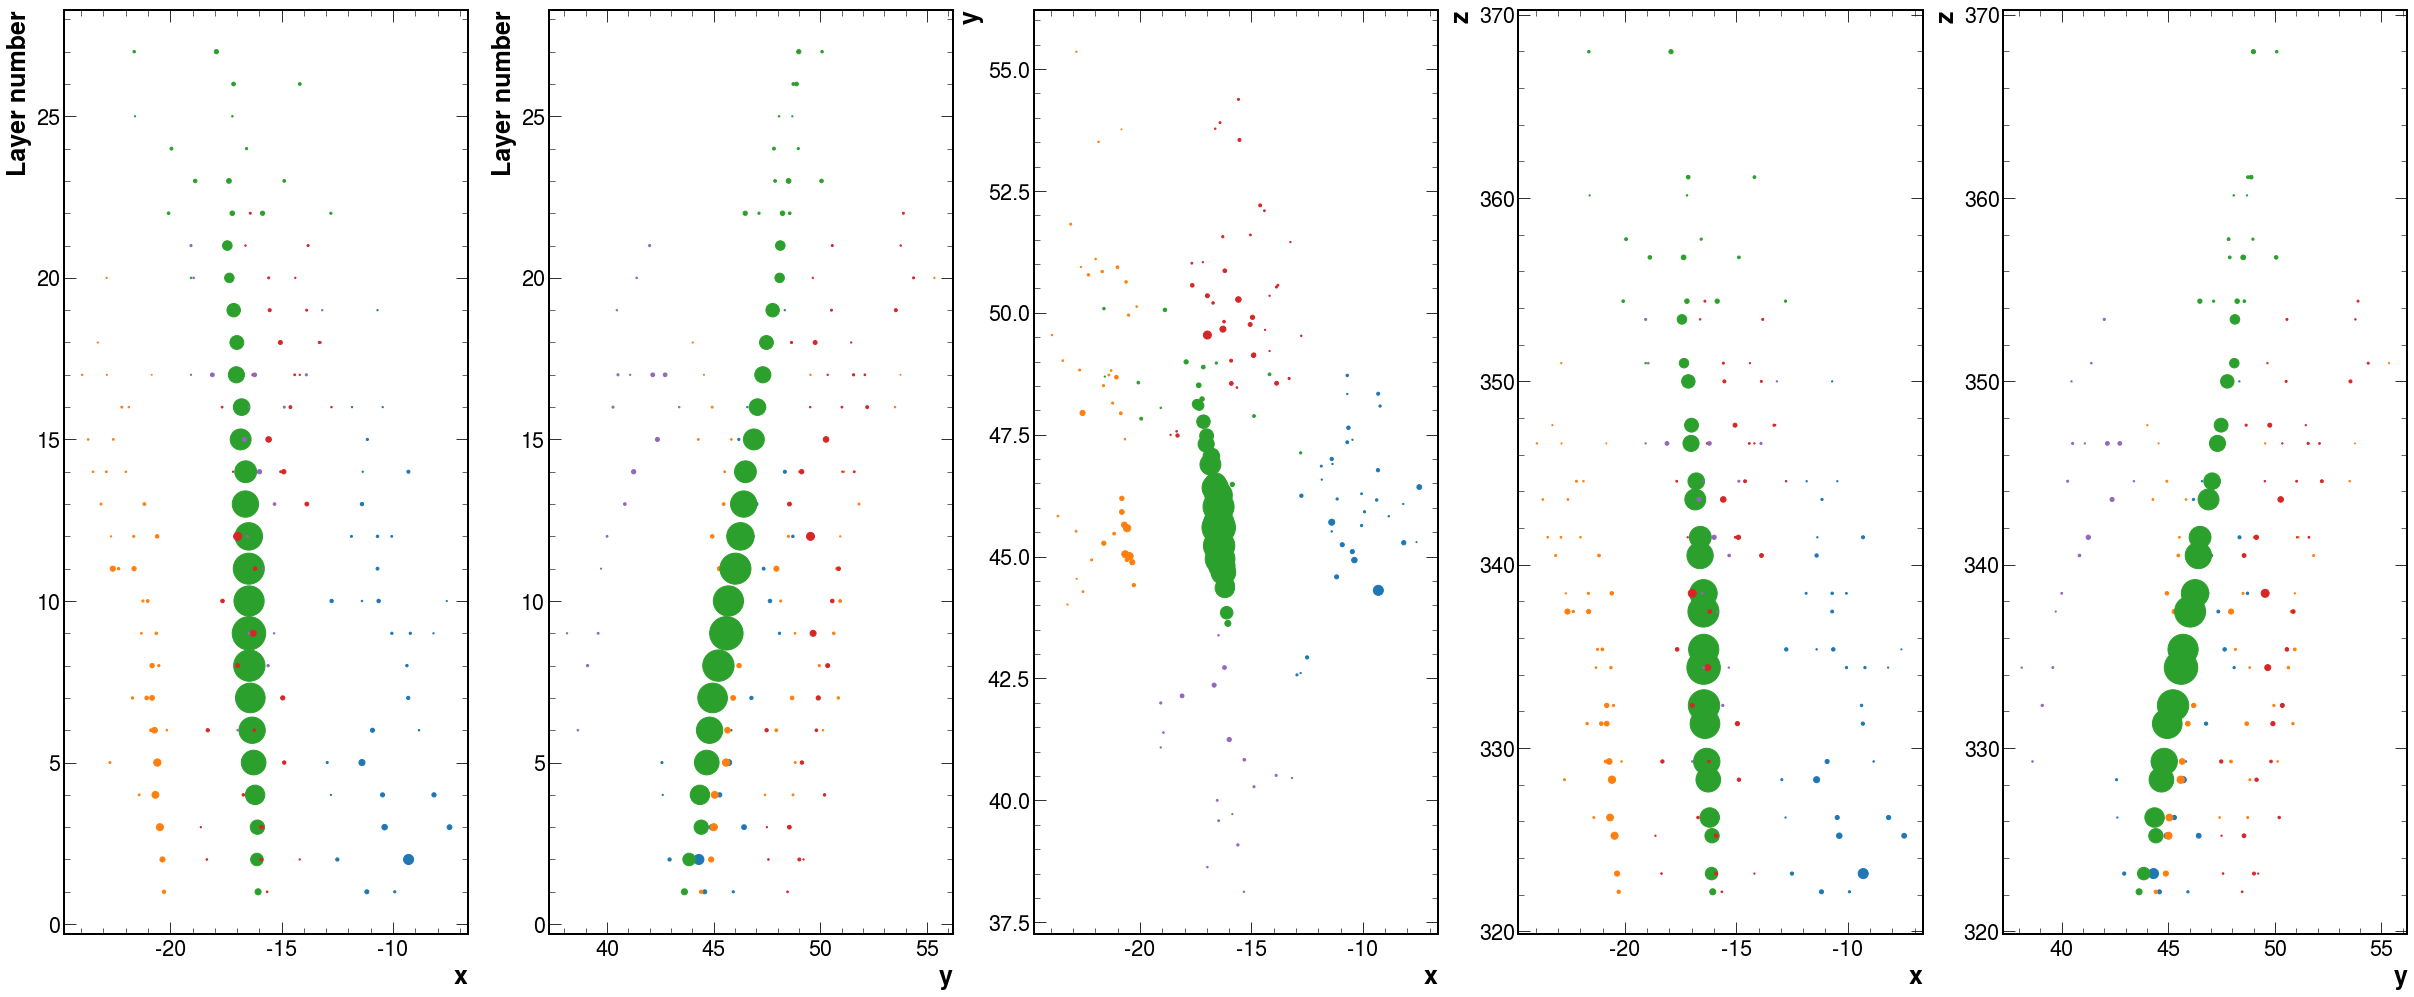

/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/llr/cms/tarabini/miniconda3/envs/torchtest/lib/python3.6/site-packages/ipykernel_launcher.py:105: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

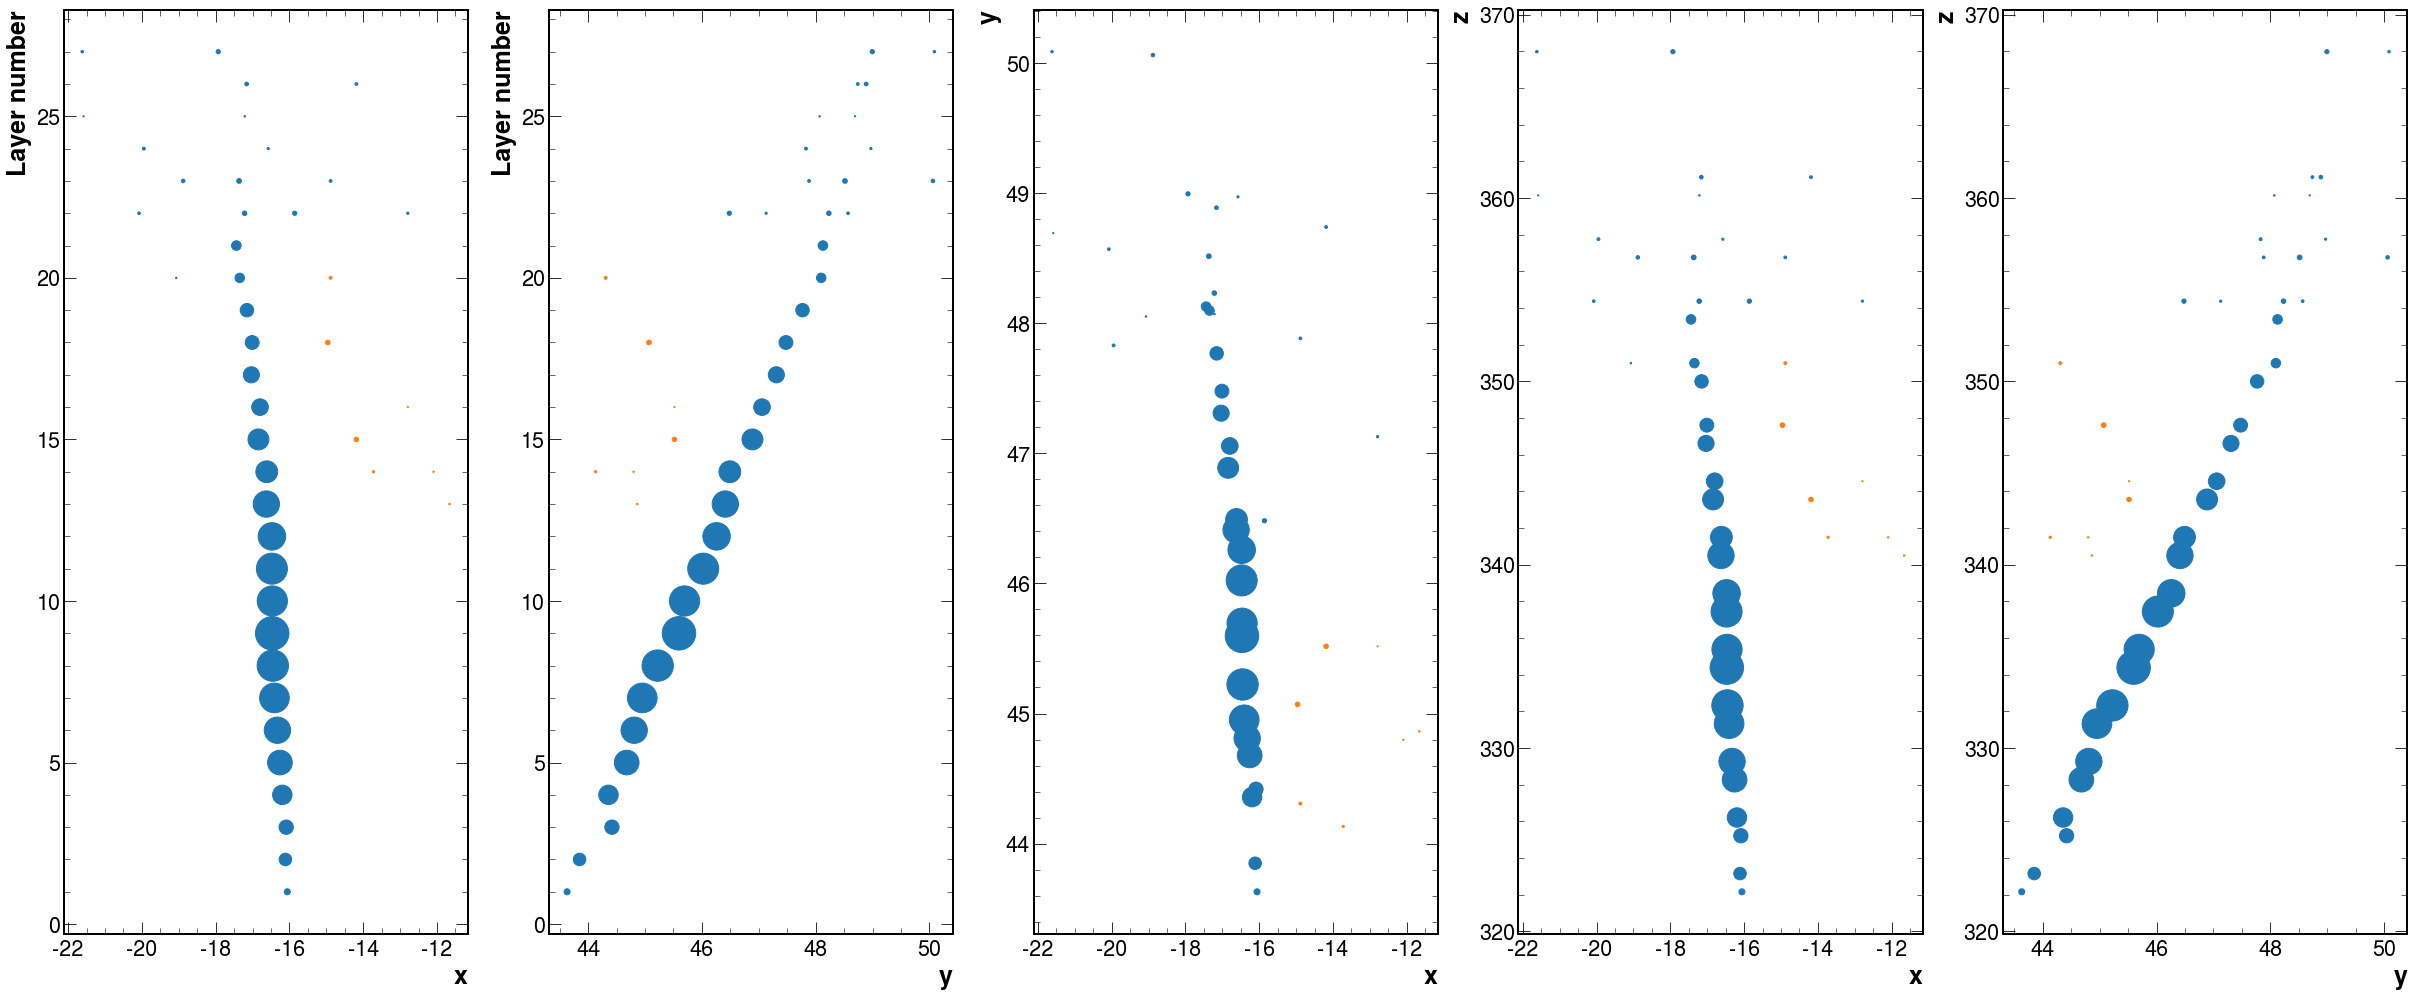

In [55]:
eventDisplay(ele, removeTrk=True, cleaned = True) 